# Predicting Energy Consumption: Harnessing Machine Learning

In [ ]:
#Import all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
energyDataFrame = pd.read_csv('/content/events.csv')
energyDataFrame.head(20)

Start time UTC         End time UTC Start time UTC+03:00  \
0   2015-12-31 21:00:00  2015-12-31 22:00:00  2016-01-01 00:00:00   
1   2015-12-31 22:00:00  2015-12-31 23:00:00  2016-01-01 01:00:00   
2   2015-12-31 23:00:00  2016-01-01 00:00:00  2016-01-01 02:00:00   
3   2016-01-01 00:00:00  2016-01-01 01:00:00  2016-01-01 03:00:00   
4   2016-01-01 01:00:00  2016-01-01 02:00:00  2016-01-01 04:00:00   
5   2016-01-01 02:00:00  2016-01-01 03:00:00  2016-01-01 05:00:00   
6   2016-01-01 03:00:00  2016-01-01 04:00:00  2016-01-01 06:00:00   
7   2016-01-01 04:00:00  2016-01-01 05:00:00  2016-01-01 07:00:00   
8   2016-01-01 05:00:00  2016-01-01 06:00:00  2016-01-01 08:00:00   
9   2016-01-01 06:00:00  2016-01-01 07:00:00  2016-01-01 09:00:00   
10  2016-01-01 07:00:00  2016-01-01 08:00:00  2016-01-01 10:00:00   
11  2016-01-01 08:00:00  2016-01-01 09:00:00  2016-01-01 11:00:00   
12  2016-01-01 09:00:00  2016-01-01 10:00:00  2016-01-01 12:00:00   
13  2016-01-01 10:00:00  2016-01-01 11:00:00  2016-01-01 13:00:00   
14  2016-01-01 11:00:00  2016-01-01 12:00:00  2016-01-01 14:00:00   
15  2016-01-01 12:00:00  2016-01-01 13:00:00  2016-01-01 15:00:00   
16  2016-01-01 13:00:00  2016-01-01 14:00:00  2016-01-01 16:00:00   
17  2016-01-01 14:00:00  2016-01-01 15:00:00  2016-01-01 17:00:00   
18  2016-01-01 15:00:00  2016-01-01 16:00:00  2016-01-01 18:00:00   
19  2016-01-01 16:00:00  2016-01-01 17:00:00  2016-01-01 19:00:00   

     End time UTC+03:00  Electricity consumption in Finland  
0   2016-01-01 01:00:00                             10800.0  
1   2016-01-01 02:00:00                             10431.0  
2   2016-01-01 03:00:00                             10005.0  
3   2016-01-01 04:00:00                              9722.0  
4   2016-01-01 05:00:00                              9599.0  
5   2016-01-01 06:00:00                              9524.0  
6   2016-01-01 07:00:00                              9601.0  
7   2016-01-01 08:00:00                              9793.0  
8   2016-01-01 09:00:00                              9815.0  
9   2016-01-01 10:00:00                              9998.0  
10  2016-01-01 11:00:00                             10035.0  
11  2016-01-01 12:00:00                             10098.0  
12  2016-01-01 13:00:00                             10345.0  
13  2016-01-01 14:00:00                             10478.0  
14  2016-01-01 15:00:00                             10551.0  
15  2016-01-01 16:00:00                             10646.0  
16  2016-01-01 17:00:00                             11104.0  
17  2016-01-01 18:00:00                             11463.0  
18  2016-01-01 19:00:00                             11494.0  
19  2016-01-01 20:00:00                             11518.0

# **Data Preparation Phase**

In [ ]:
energyDataFrame.info()
energyDataFrame.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000

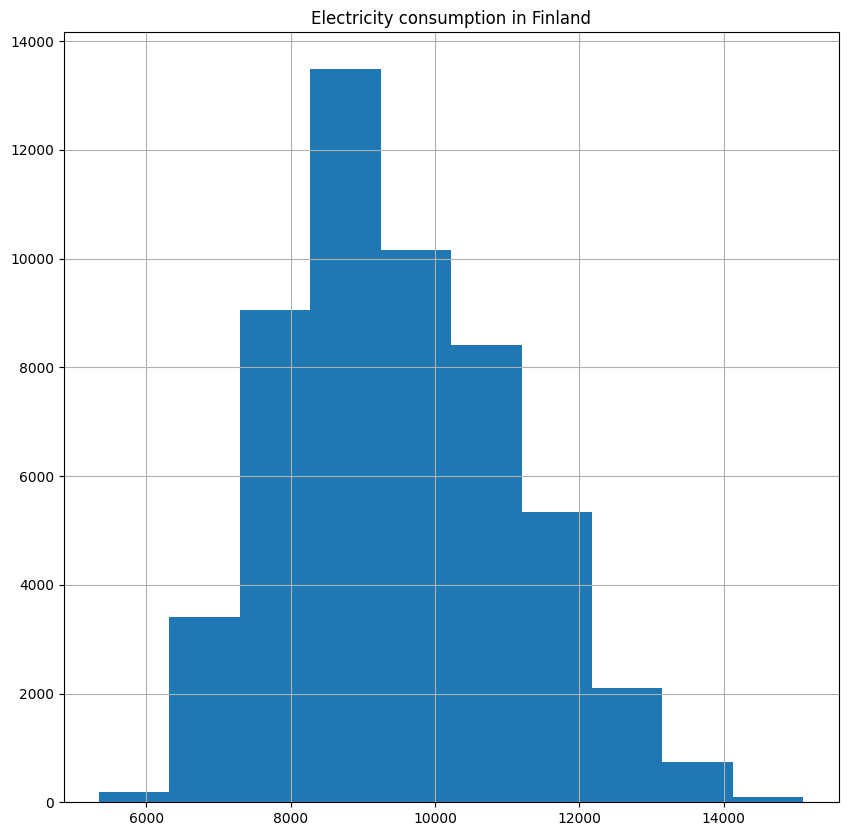

In [ ]:
energyDataFrame.hist(figsize=(10, 10))
plt.show()

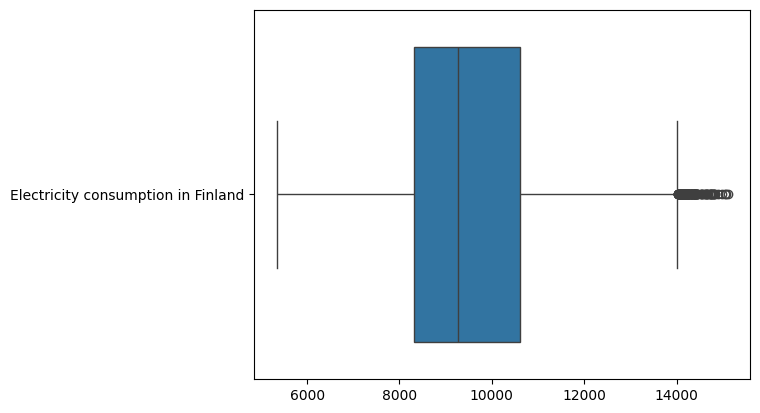

In [ ]:
sns.boxplot(data=energyDataFrame, orient="h")
plt.show()

In [ ]:
del energyDataFrame["Start time UTC"]
del energyDataFrame["End time UTC"]
del energyDataFrame["Start time UTC+03:00"]
energyDataFrame.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Electricity Consumption Rates"},inplace=True)
print(energyDataFrame.head(20))

               DateTime  Electricity Consumption Rates
0   2016-01-01 01:00:00                        10800.0
1   2016-01-01 02:00:00                        10431.0
2   2016-01-01 03:00:00                        10005.0
3   2016-01-01 04:00:00                         9722.0
4   2016-01-01 05:00:00                         9599.0
5   2016-01-01 06:00:00                         9524.0
6   2016-01-01 07:00:00                         9601.0
7   2016-01-01 08:00:00                         9793.0
8   2016-01-01 09:00:00                         9815.0
9   2016-01-01 10:00:00                         9998.0
10  2016-01-01 11:00:00                        10035.0
11  2016-01-01 12:00:00                        10098.0
12  2016-01-01 13:00:00                        10345.0
13  2016-01-01 14:00:00                        10478.0
14  2016-01-01 15:00:00                        10551.0
15  2016-01-01 16:00:00                        10646.0
16  2016-01-01 17:00:00                        11104.0
17  2016-0

In [ ]:
# Converting the Time Series Data to the Date Time Format.
energyDataSet = energyDataFrame.copy()  # Make a copy of energyDataFrame
energyDataSet["Month"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.month
energyDataSet["Year"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.year
energyDataSet["Date"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.date
energyDataSet["Time"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.time
energyDataSet["Week"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.isocalendar().week
energyDataSet["Day"] = pd.to_datetime(energyDataFrame["DateTime"]).dt.day_name()
energyDataSet.set_index("DateTime", inplace=True)
energyDataSet.index = pd.to_datetime(energyDataSet.index)

In [ ]:
# Code to get Type for each attribute in energyDataset
for col in energyDataSet.columns:
    print(col, ":", energyDataSet[col].dtype)

Electricity Consumption Rates : float64
Month : int32
Year : int32
Date : object
Time : object
Week : UInt32
Day : object


In [ ]:
energyDataSet.head(20)
# Download energyDataset
energyDataSet.to_csv("energyDataSet.csv")

In [ ]:
# Total Number of Years
print(energyDataSet.index.year.nunique())
print(energyDataSet.Year.unique())

7
[2016 2017 2018 2019 2020 2021 2022]


In [ ]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So removing first 71 rows and last 121 rows.
energyDataSet = energyDataSet.iloc[71:-121]
#energyDataSet.head(20)
energyDataSet.tail(20)

Electricity Consumption Rates  Month  Year        Date  \
DateTime                                                                      
2021-12-26 04:00:00                        11151.0     12  2021  2021-12-26   
2021-12-26 05:00:00                        11165.0     12  2021  2021-12-26   
2021-12-26 06:00:00                        11206.0     12  2021  2021-12-26   
2021-12-26 07:00:00                        11296.0     12  2021  2021-12-26   
2021-12-26 08:00:00                        11477.0     12  2021  2021-12-26   
2021-12-26 09:00:00                        11516.0     12  2021  2021-12-26   
2021-12-26 10:00:00                        11860.0     12  2021  2021-12-26   
2021-12-26 11:00:00                        12015.0     12  2021  2021-12-26   
2021-12-26 12:00:00                        12119.0     12  2021  2021-12-26   
2021-12-26 13:00:00                        12226.0     12  2021  2021-12-26   
2021-12-26 14:00:00                        12205.0     12  2021  2021-12-26   
2021-12-26 15:00:00                        12050.0     12  2021  2021-12-26   
2021-12-26 16:00:00                        12072.0     12  2021  2021-12-26   
2021-12-26 17:00:00                        12212.0     12  2021  2021-12-26   
2021-12-26 18:00:00                        12495.0     12  2021  2021-12-26   
2021-12-26 19:00:00                        12550.0     12  2021  2021-12-26   
2021-12-26 20:00:00                        12622.0     12  2021  2021-12-26   
2021-12-26 21:00:00                        12574.0     12  2021  2021-12-26   
2021-12-26 22:00:00                        12384.0     12  2021  2021-12-26   
2021-12-26 23:00:00                        12044.0     12  2021  2021-12-26   

                         Time  Week     Day  
DateTime                                     
2021-12-26 04:00:00  04:00:00    51  Sunday  
2021-12-26 05:00:00  05:00:00    51  Sunday  
2021-12-26 06:00:00  06:00:00    51  Sunday  
2021-12-26 07:00:00  07:00:00    51  Sunday  
2021-12-26 08:00:00  08:00:00    51  Sunday  
2021-12-26 09:00:00  09:00:00    51  Sunday  
2021-12-26 10:00:00  10:00:00    51  Sunday  
2021-12-26 11:00:00  11:00:00    51  Sunday  
2021-12-26 12:00:00  12:00:00    51  Sunday  
2021-12-26 13:00:00  13:00:00    51  Sunday  
2021-12-26 14:00:00  14:00:00    51  Sunday  
2021-12-26 15:00:00  15:00:00    51  Sunday  
2021-12-26 16:00:00  16:00:00    51  Sunday  
2021-12-26 17:00:00  17:00:00    51  Sunday  
2021-12-26 18:00:00  18:00:00    51  Sunday  
2021-12-26 19:00:00  19:00:00    51  Sunday  
2021-12-26 20:00:00  20:00:00    51  Sunday  
2021-12-26 21:00:00  21:00:00    51  Sunday  
2021-12-26 22:00:00  22:00:00    51  Sunday  
2021-12-26 23:00:00  23:00:00    51  Sunday

# **Visualizing and Summarizing the Data.**

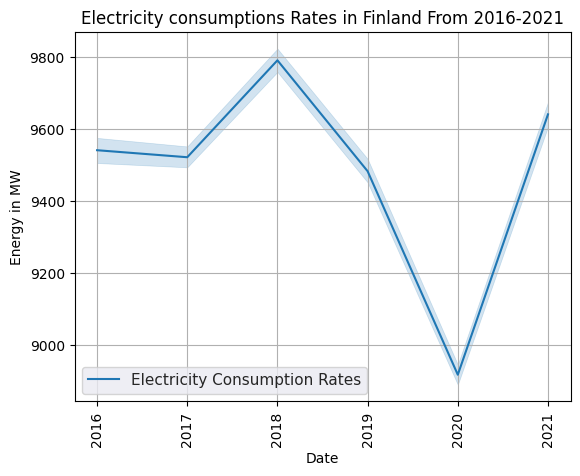

In [ ]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= energyDataSet["Year"], y= energyDataSet["Electricity Consumption Rates"], data = energyDataSet, label = "Electricity Consumption Rates")
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumptions Rates in Finland From 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

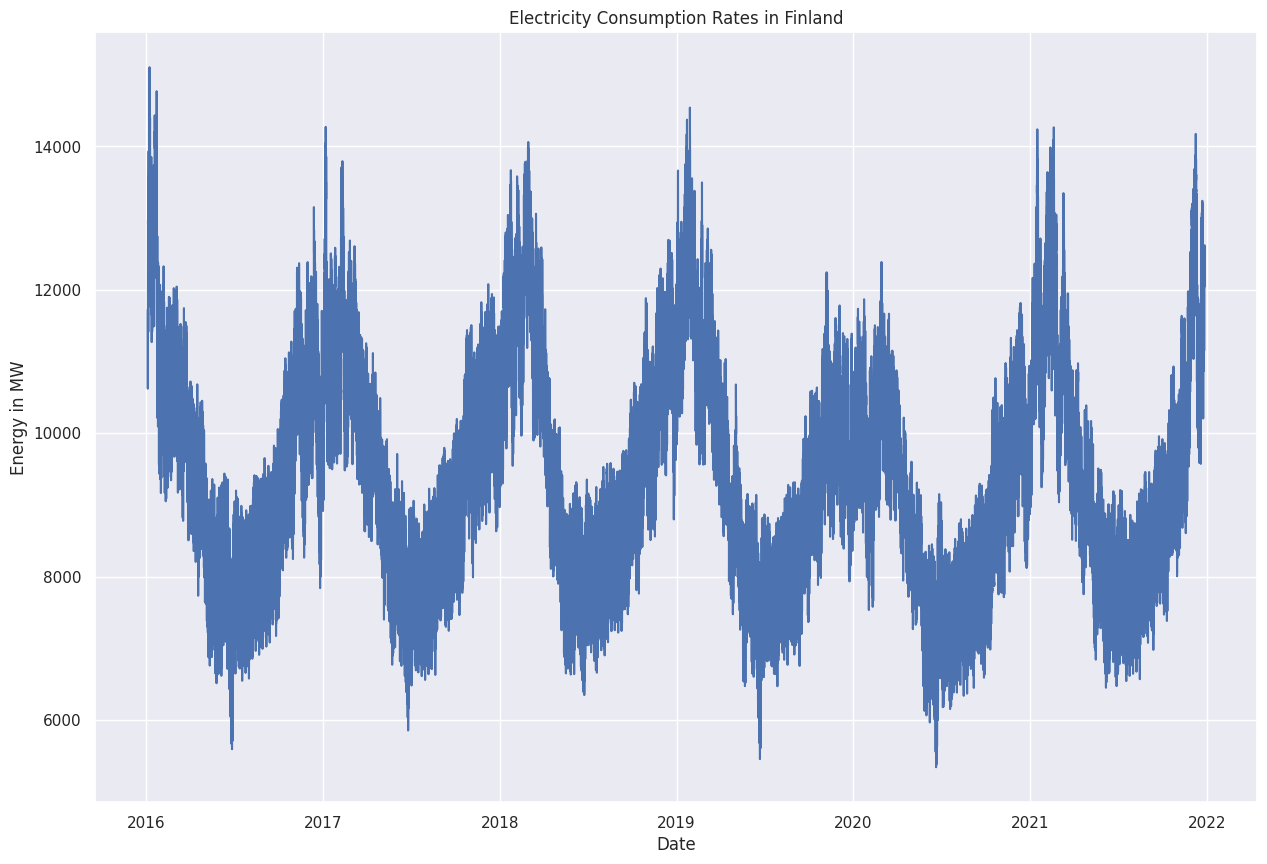

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(energyDataSet["Electricity Consumption Rates"])
plt.title("Electricity Consumption Rates in Finland")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.show()

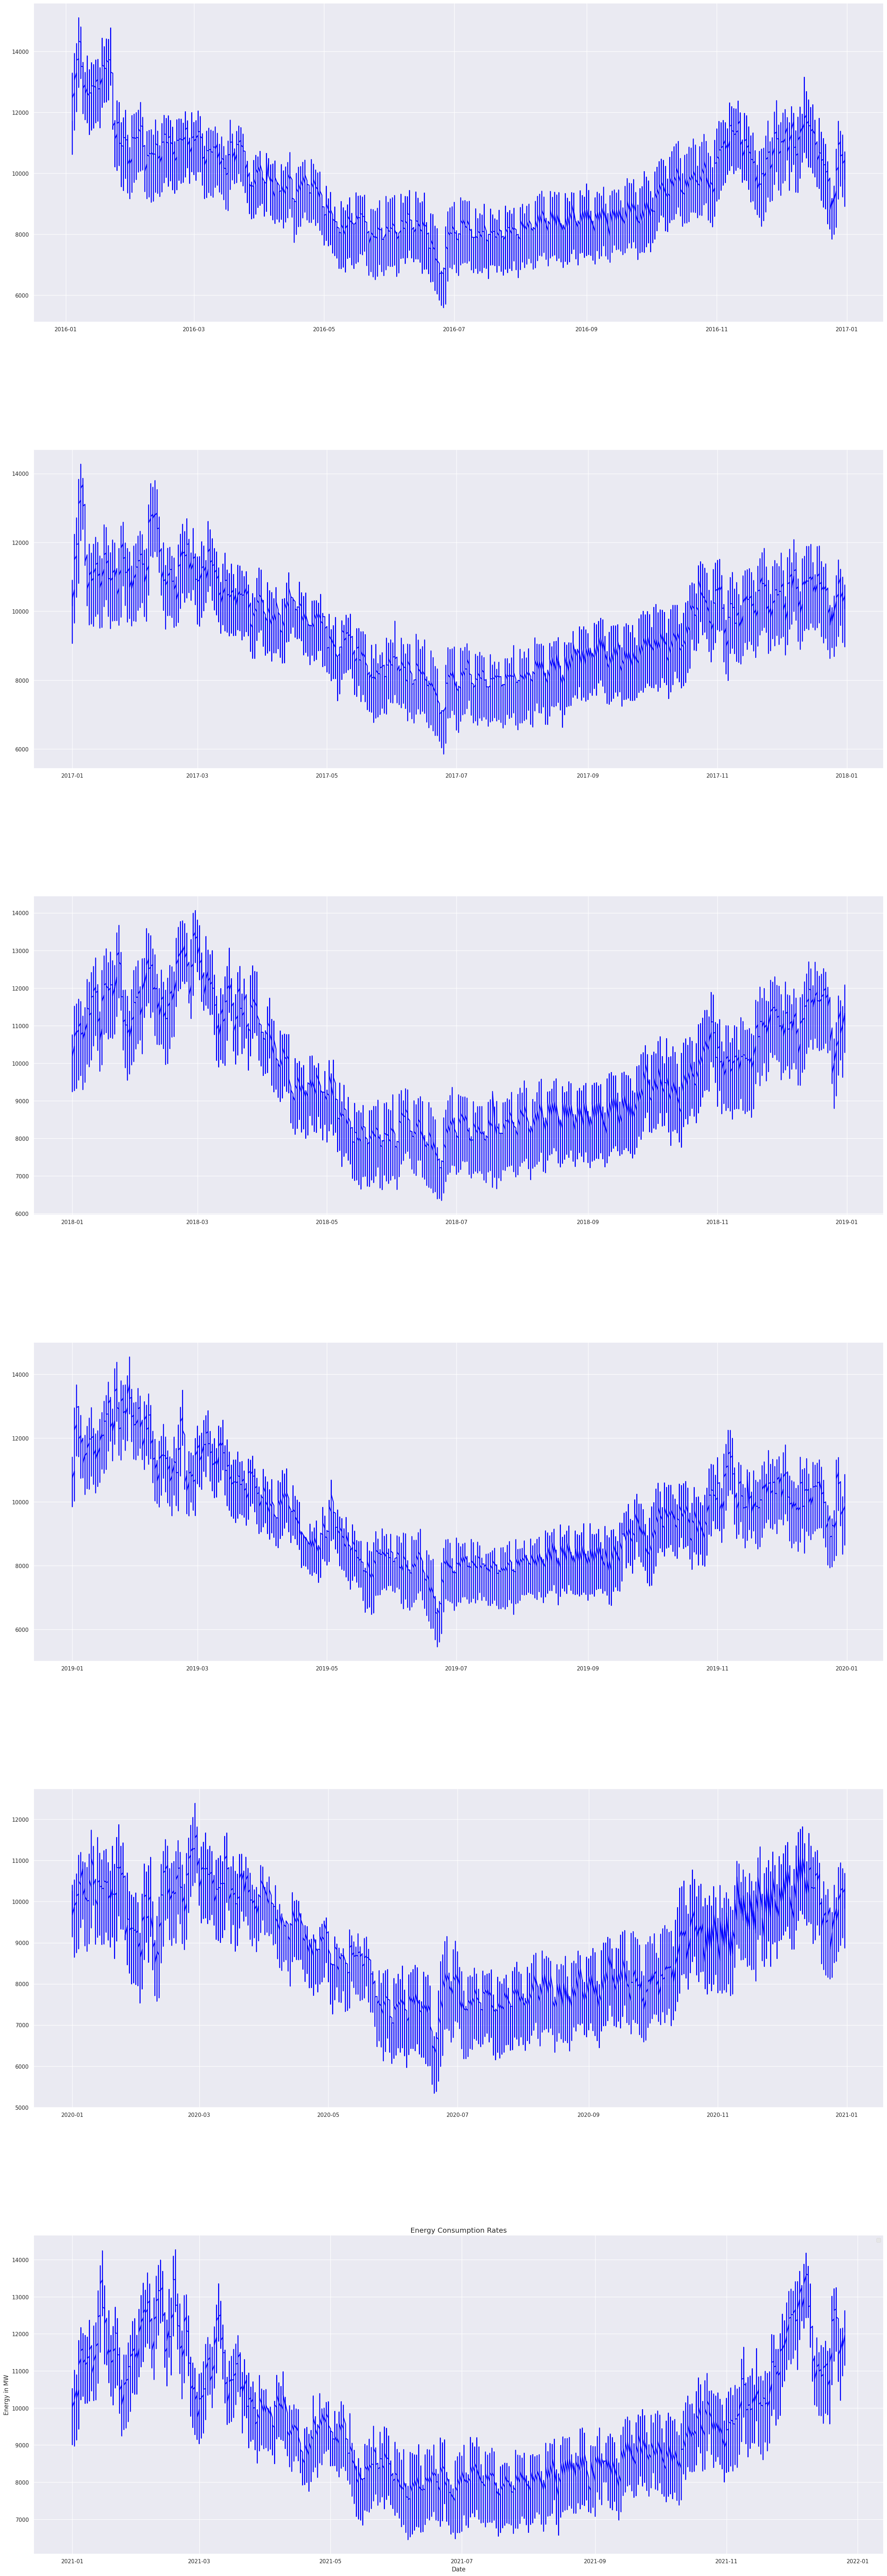

In [ ]:
# Energy Consumption Each Year
from matplotlib import style
fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = energyDataSet.loc["2016"]["Electricity Consumption Rates"].to_list()
x_2016 = energyDataSet.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = energyDataSet.loc["2017"]["Electricity Consumption Rates"].to_list()
x_2017 = energyDataSet.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = energyDataSet.loc["2018"]["Electricity Consumption Rates"].to_list()
x_2018 = energyDataSet.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = energyDataSet.loc["2019"]["Electricity Consumption Rates"].to_list()
x_2019 = energyDataSet.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = energyDataSet.loc["2020"]["Electricity Consumption Rates"].to_list()
x_2020 = energyDataSet.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = energyDataSet.loc["2021"]["Electricity Consumption Rates"].to_list()
x_2021 = energyDataSet.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption Rates")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-17-4bdc68782360>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energyDataSet["Electricity Consumption Rates"])


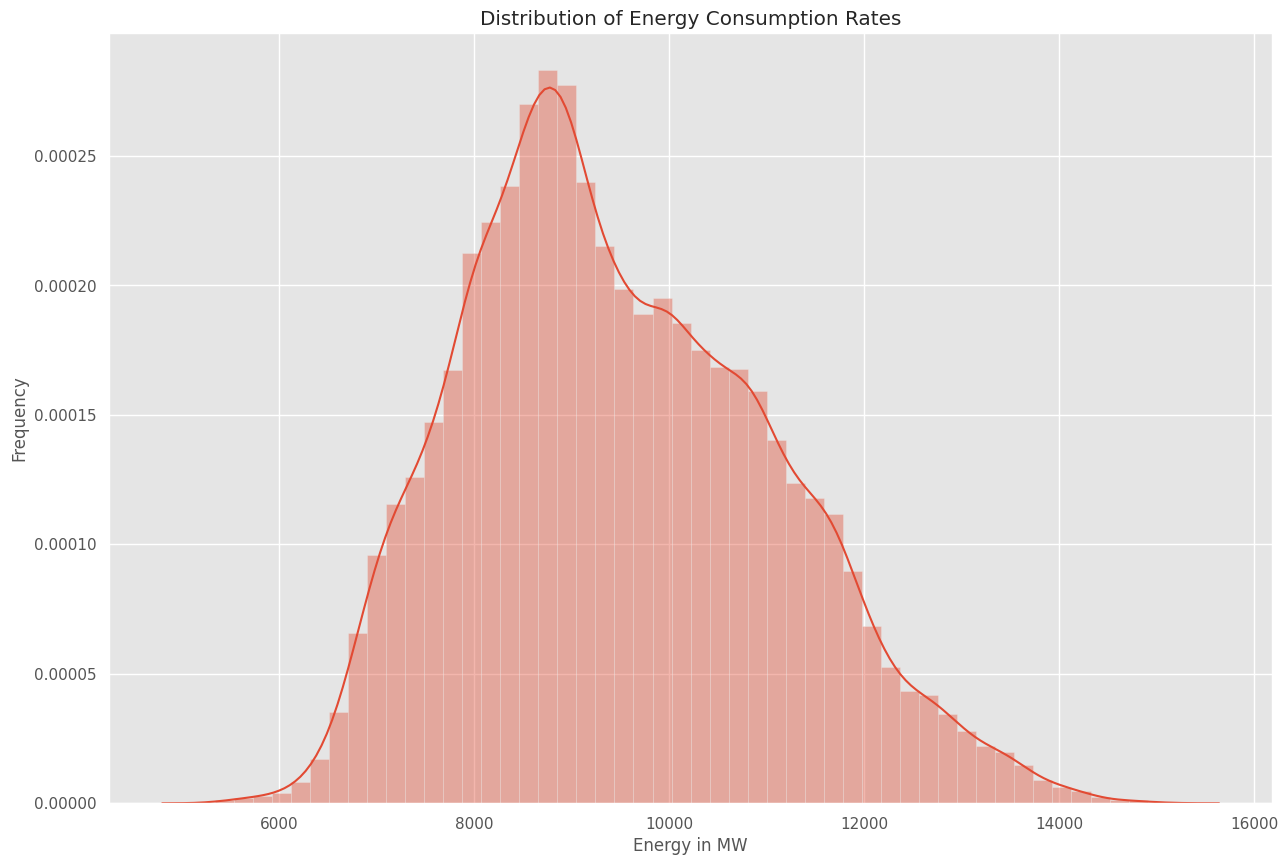

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.distplot(energyDataSet["Electricity Consumption Rates"])
plt.title("Distribution of Energy Consumption Rates")
plt.xlabel("Energy in MW")
plt.ylabel("Frequency")
plt.show()

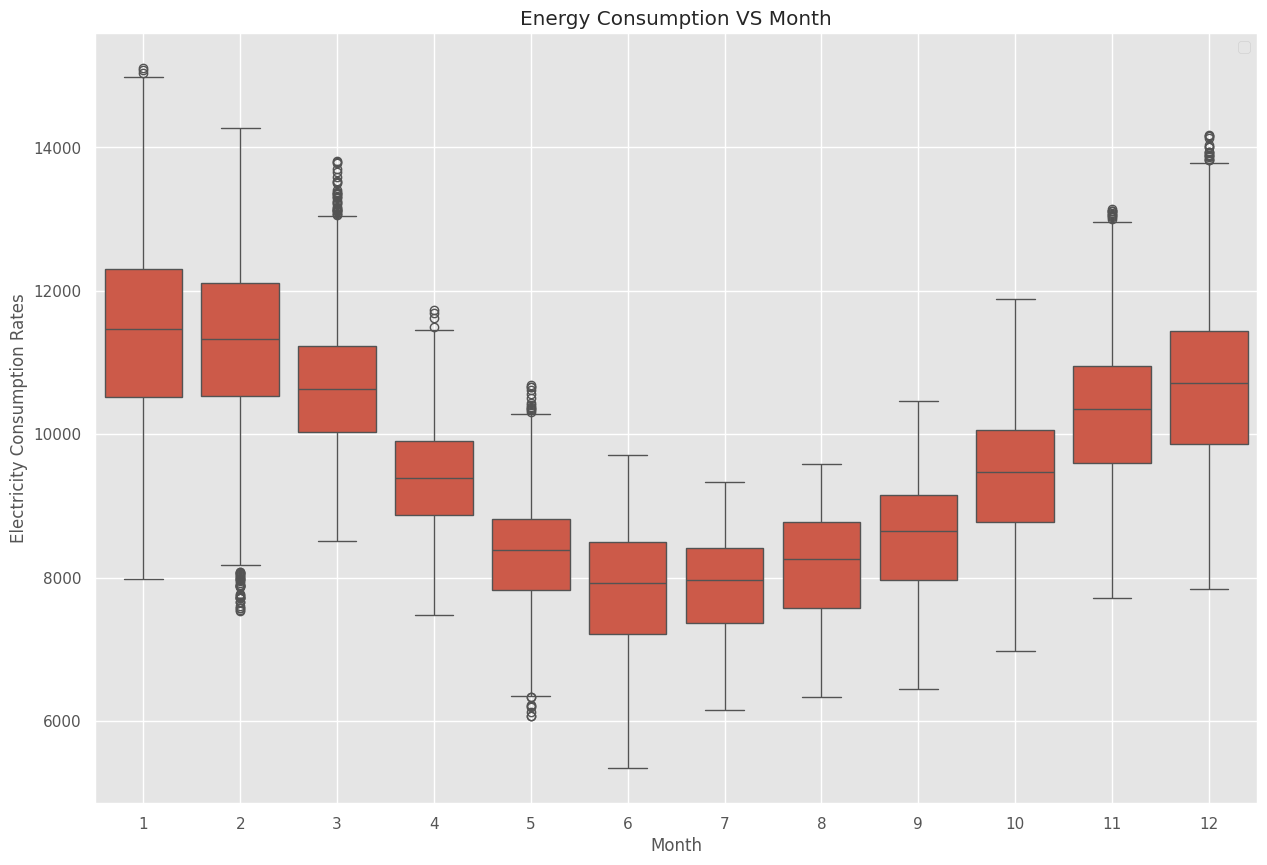

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=energyDataSet["Month"], y=energyDataSet["Electricity Consumption Rates"], data= energyDataFrame)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

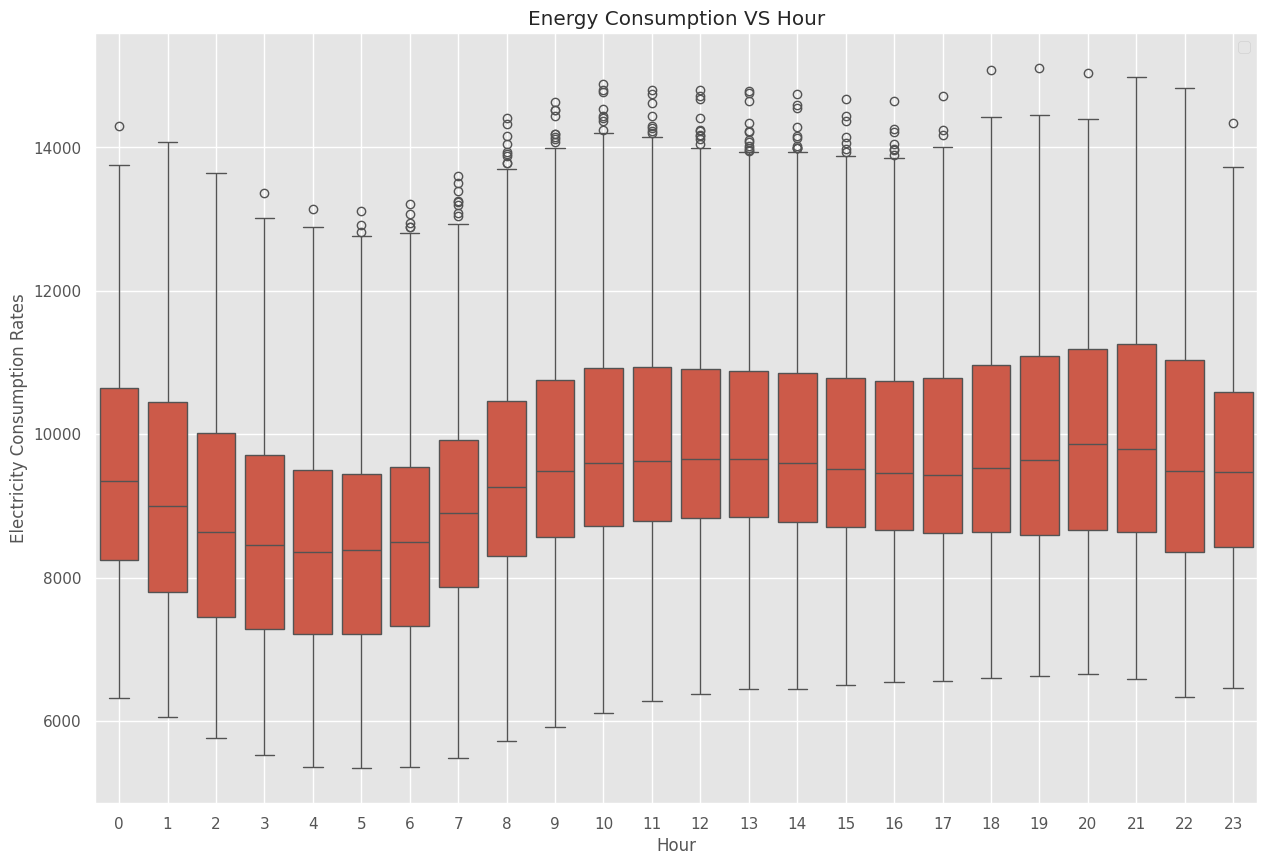

In [ ]:
energyDataSet1 = energyDataSet
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=energyDataSet1.index.hour, y=energyDataSet1["Electricity Consumption Rates"], data= energyDataSet)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

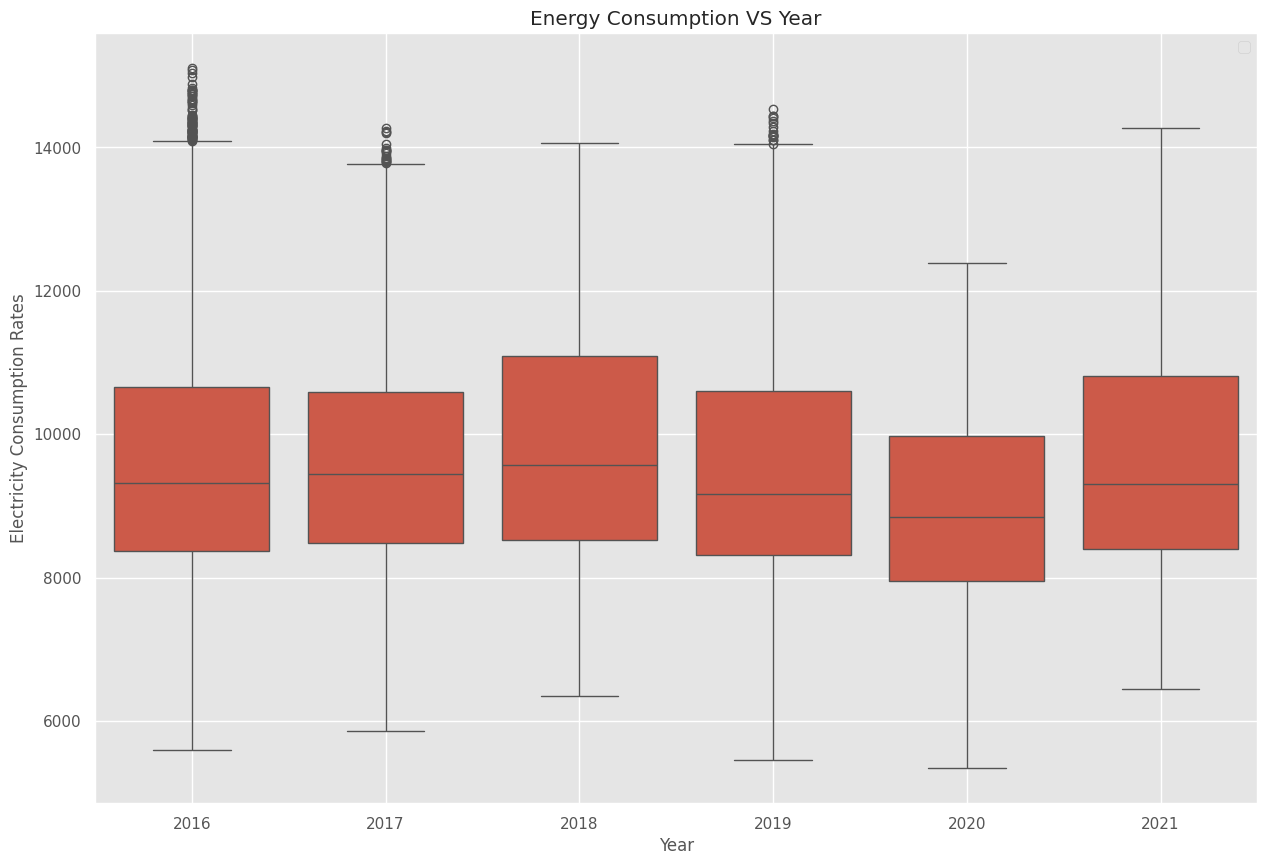

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=energyDataSet1.index.year, y=energyDataSet1["Electricity Consumption Rates"], data= energyDataSet)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


#**Model Building : Using Ridge Regression Model.**

In [ ]:
# Select numeric columns for resampling
numeric_columns = energyDataSet.select_dtypes(include=['float64', 'int64'])

# Resample numeric columns
newNumericEnergyDataSet = numeric_columns.resample("D").mean()

# Select non-numeric columns and forward-fill them
non_numeric_columns = energyDataSet.select_dtypes(include=['object'])
newNonNumericEnergyDataSet = non_numeric_columns.resample("D").first().ffill()

# Combine numeric and non-numeric resampled datasets
newEnergyDataSetForRidge = pd.concat([newNumericEnergyDataSet, newNonNumericEnergyDataSet], axis=1)

# Extract Month, Year, and Week from DateTime index
newEnergyDataSetForRidge['Month'] = newEnergyDataSetForRidge.index.month
newEnergyDataSetForRidge['Year'] = newEnergyDataSetForRidge.index.year
newEnergyDataSetForRidge['Week'] = newEnergyDataSetForRidge.index.isocalendar().week

# Reorder columns as desired
newEnergyDataSetForRidge = newEnergyDataSetForRidge[['Electricity Consumption Rates', 'Month', 'Year', 'Week']]

print("Old Dataset: ", energyDataSet.shape)
print("New Dataset: ", newEnergyDataSetForRidge.shape)
newEnergyDataSetForRidge.head(20)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


Electricity Consumption Rates  Month  Year  Week
DateTime                                                    
2016-01-04                   12300.625000      1  2016     1
2016-01-05                   12945.375000      1  2016     1
2016-01-06                   13192.750000      1  2016     1
2016-01-07                   14243.541667      1  2016     1
2016-01-08                   14121.666667      1  2016     1
2016-01-09                   12831.750000      1  2016     1
2016-01-10                   12519.000000      1  2016     1
2016-01-11                   12887.368421      1  2016     2
2016-01-12                   12658.166667      1  2016     2
2016-01-13                   12883.041667      1  2016     2
2016-01-14                   12855.041667      1  2016     2
2016-01-15                   12974.416667      1  2016     2
2016-01-16                   12661.250000      1  2016     2
2016-01-17                   12378.708333      1  2016     2
2016-01-18                   13578.791667      1  2016     3
2016-01-19                   13531.791667      1  2016     3
2016-01-20                   13671.541667      1  2016     3
2016-01-21                   13677.166667      1  2016     3
2016-01-22                   13975.416667      1  2016     3
2016-01-23                   12082.416667      1  2016     3

In [ ]:
y = newEnergyDataSetForRidge['Electricity Consumption Rates']
print(y[1])
print(y.shape)
# Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before fitting into Ridge Model:")
print(y[:10])

12945.375
(2184,)
Normalizing data before fitting into Ridge Model:
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]
print("Training data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print("Validation data shape: ", val_data.shape)

Training data shape:  (1398, 1)
Test data shape:  (437, 1)
Validation data shape:  (349, 1)


In [ ]:
# The create_dataset function transforms a time series dataset into input-output pairs for time series forecasting.
# Given a dataset and a specified number of previous time steps (time_step), it creates sequences of past observations (dataX)
# and their corresponding future values (dataY).
# These pairs are useful for training models to predict future values based on historical data.

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)
print("y_train shape:",y_train.shape)
print("ytest shape:",ytest.shape)
print("yval shape:",yval.shape)

X_train shape:  (1297, 100)
X_test shape:  (336, 100)
X_val shape:  (248, 100)
y_train shape: (1297,)
ytest shape: (336,)
yval shape: (248,)


In [ ]:
# Forecasting energy consumption using Ridge Regression
import sklearn.linear_model
from sklearn.linear_model import Ridge
model2 = Ridge()
model2.fit(X_train, y_train)


Ridge()

In [ ]:
import tensorflow as tf
tf.__version__
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)
val_predict=model2.predict(X_val)


train_predict = train_predict.reshape(train_predict.shape[0], 1)
test_predict = test_predict.reshape(test_predict.shape[0], 1)
val_predict = val_predict.reshape(val_predict.shape[0], 1)
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)


train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
# math.sqrt(mean_squared_error(ytest,test_predict))
# math.sqrt(mean_squared_error(yval,val_predict))

(1297, 1)
(336, 1)
(248, 1)


9567.255045567184

In [ ]:
train_predictions = model2.predict(X_train)
train_predictions= train_predictions.reshape(train_predictions.shape[0], 1)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

Train Predictions               Actuals
0      [9322.184117646659]   [9406.708333333334]
1      [9529.973009337084]   [9614.791666666666]
2      [9707.022025998656]   [9894.708333333334]
3       [9164.99522636583]   [8933.708333333334]
4      [8684.928438149274]   [8557.208333333334]
...                    ...                   ...
1292   [8924.663985781375]   [9259.666666666666]
1293   [9848.114277767787]             [10248.5]
1294  [10159.004333290095]  [10360.333333333334]
1295   [10180.13105371777]  [10489.833333333334]
1296   [10344.76984179603]             [10204.5]

[1297 rows x 2 columns]

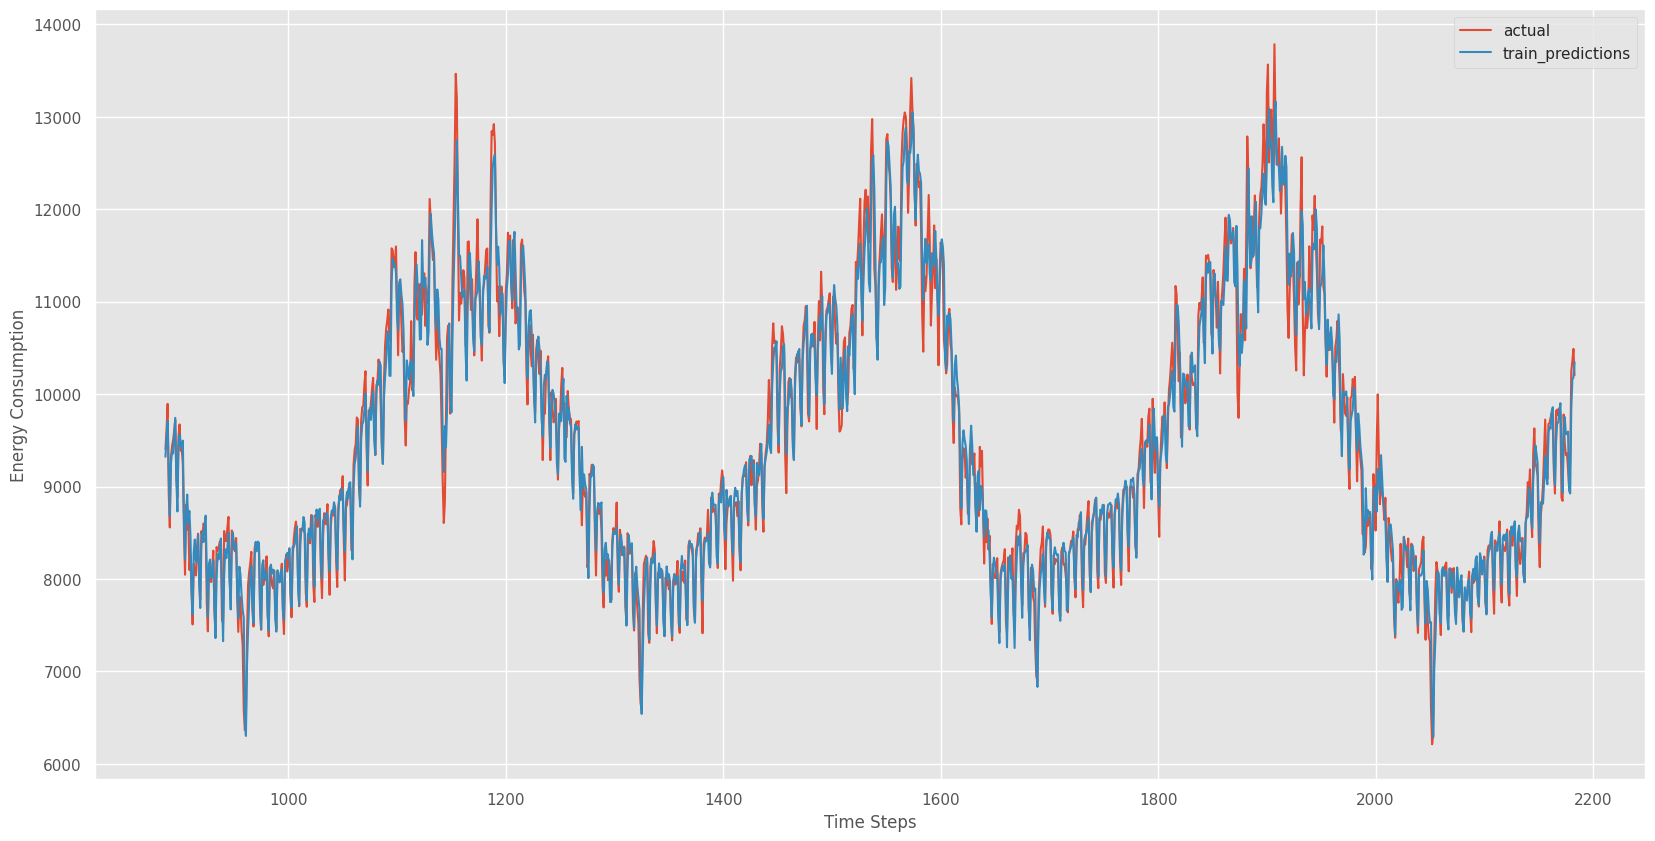

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')
plt.show()

In [ ]:
# Predicting consumption using validation data
val_predictions = model2.predict(X_val)
val_predictions= val_predictions.reshape(val_predictions.shape[0], 1)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

Val Predictions           Actuals_val
0     [9246.891977073252]            [8931.875]
1     [9211.107897285981]   [9112.916666666666]
2     [9130.862353911027]  [10019.416666666666]
3     [9761.346264588086]           [10390.375]
4    [10186.209633213937]  [10802.916666666666]
..                    ...                   ...
243   [8127.337858279051]   [8020.541666666667]
244    [7924.44700068782]             [7921.75]
245   [8544.836264018282]   [8705.041666666666]
246   [8779.986071929177]   [8824.708333333334]
247   [8813.260089301928]            [9062.375]

[248 rows x 2 columns]

Text(0, 0.5, ' Energy Consumption')

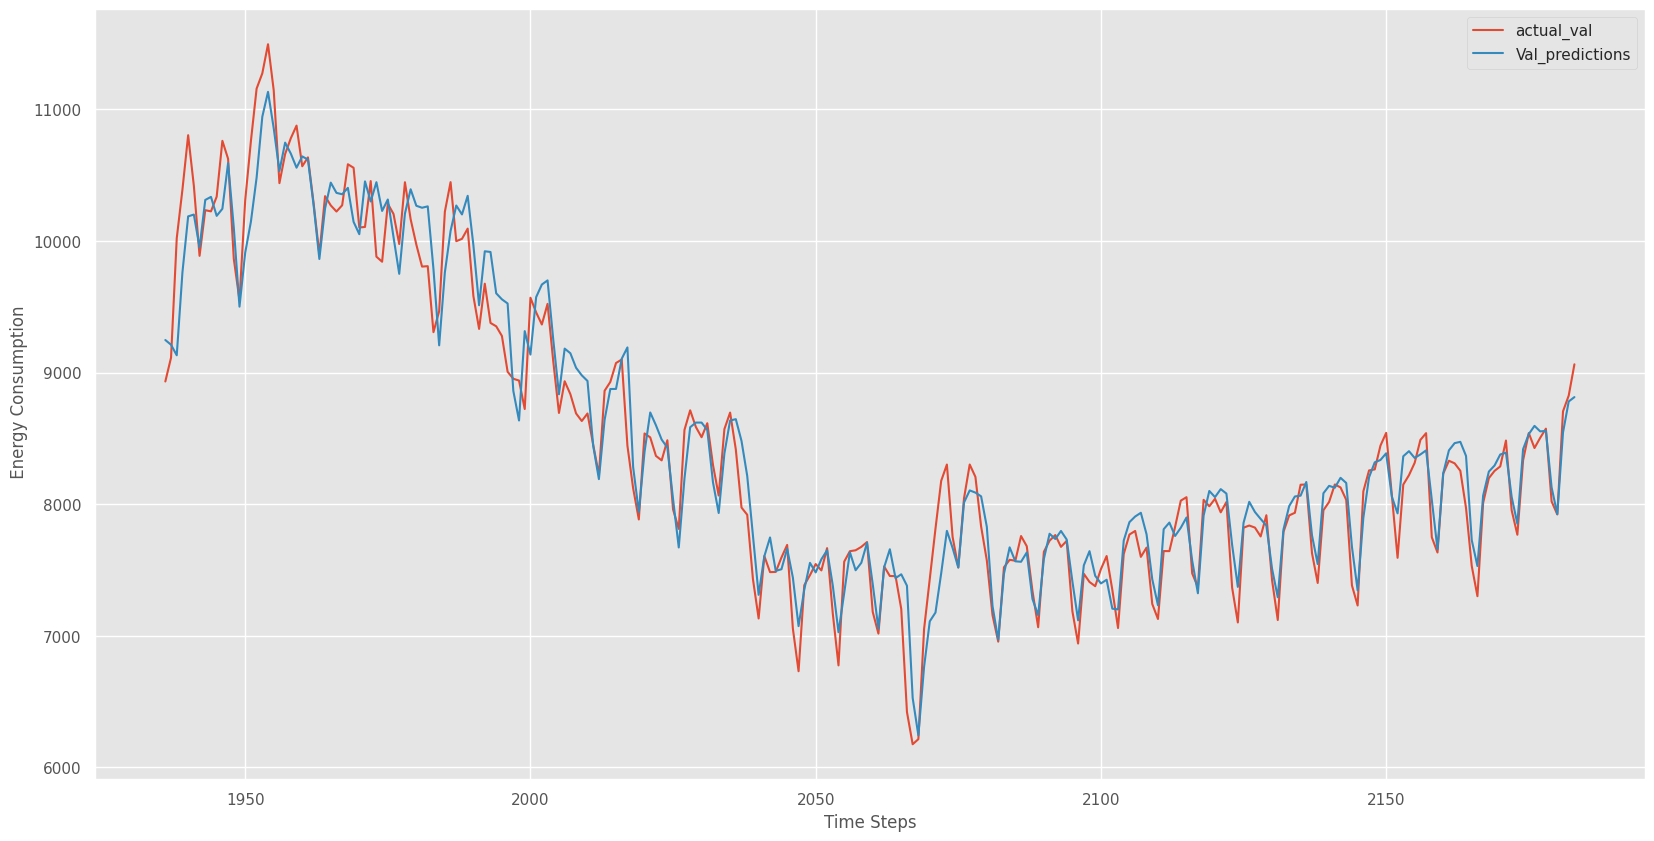

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel(' Energy Consumption')

In [ ]:
test_predictions = model2.predict(X_test)
test_predictions= test_predictions.reshape(test_predictions.shape[0], 1)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

test Predictions          Actuals_test
0    [10369.848909275679]  [10032.541666666666]
1    [10553.116448206069]           [10732.125]
2    [10730.053750228702]  [10733.583333333334]
3    [10788.189173727025]           [10971.875]
4    [10971.629385537135]  [11227.791666666666]
..                    ...                   ...
331  [12077.675434867258]            [12540.25]
332  [12291.693462674517]  [12635.958333333334]
333  [12543.537314594952]  [11684.333333333334]
334  [12113.367487053723]  [11384.166666666666]
335  [11293.212935369042]           [11581.625]

[336 rows x 2 columns]

Text(0, 0.5, 'Energy Consumption')

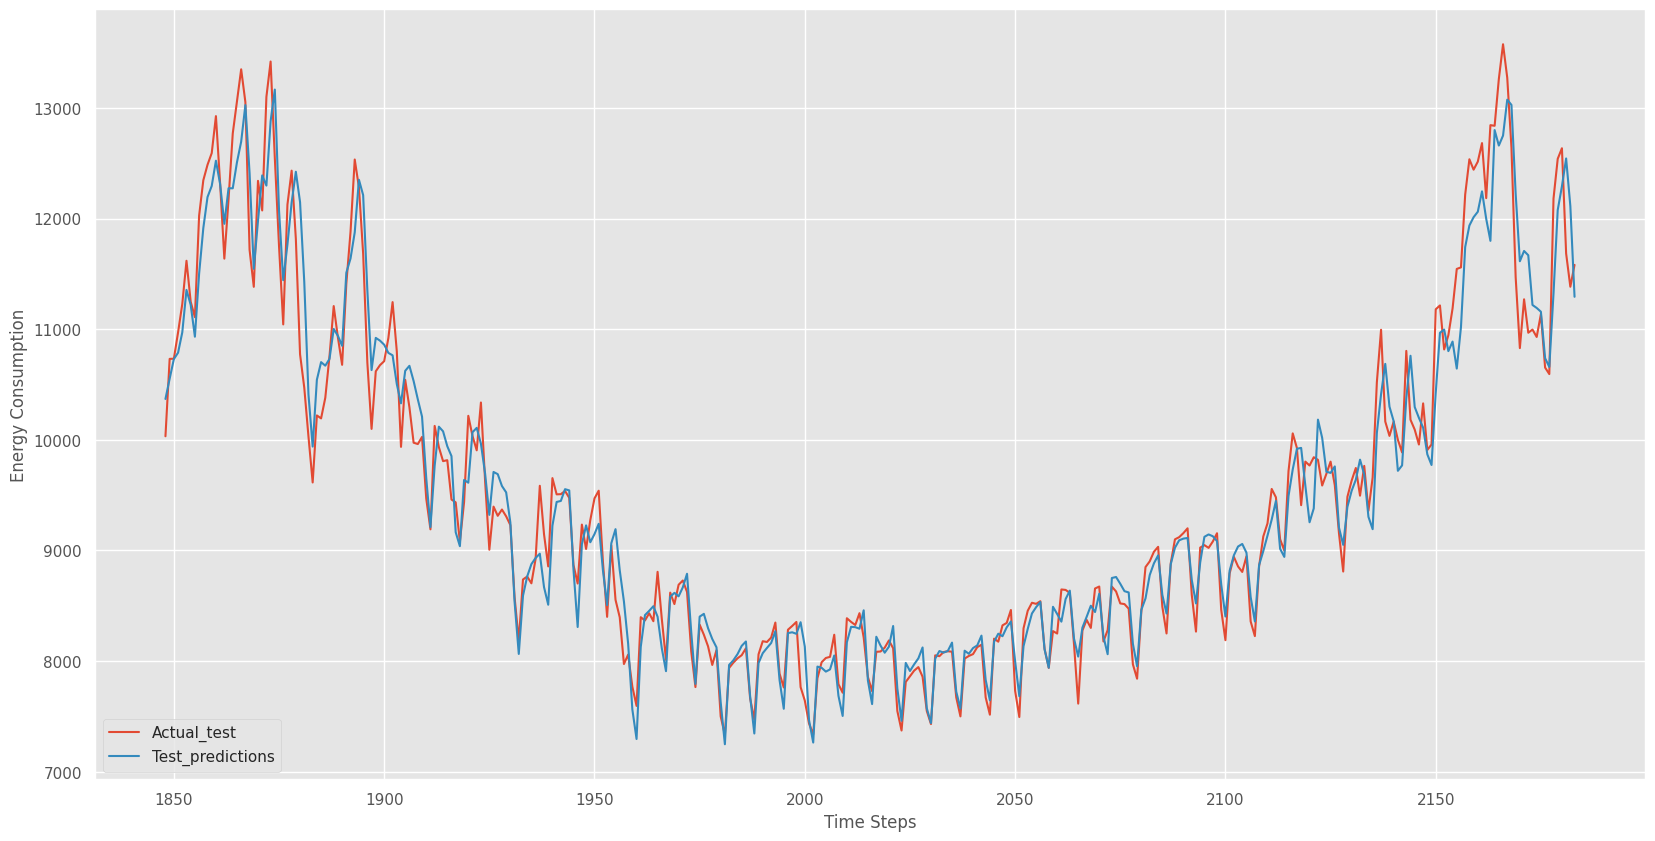

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')

# **Model Bulding : Using ARIMA**

In [ ]:
energyDataSet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Electricity Consumption Rates  52774 non-null  float64
 1   Month                          52774 non-null  int32  
 2   Year                           52774 non-null  int32  
 3   Date                           52774 non-null  object 
 4   Time                           52774 non-null  object 
 5   Week                           52774 non-null  UInt32 
 6   Day                            52774 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(3)
memory usage: 2.7+ MB


In [ ]:
df_monthly = energyDataSet['Electricity Consumption Rates'].resample('M').sum()

In [ ]:
df_monthly.shape

(72,)

<Axes: xlabel='DateTime'>

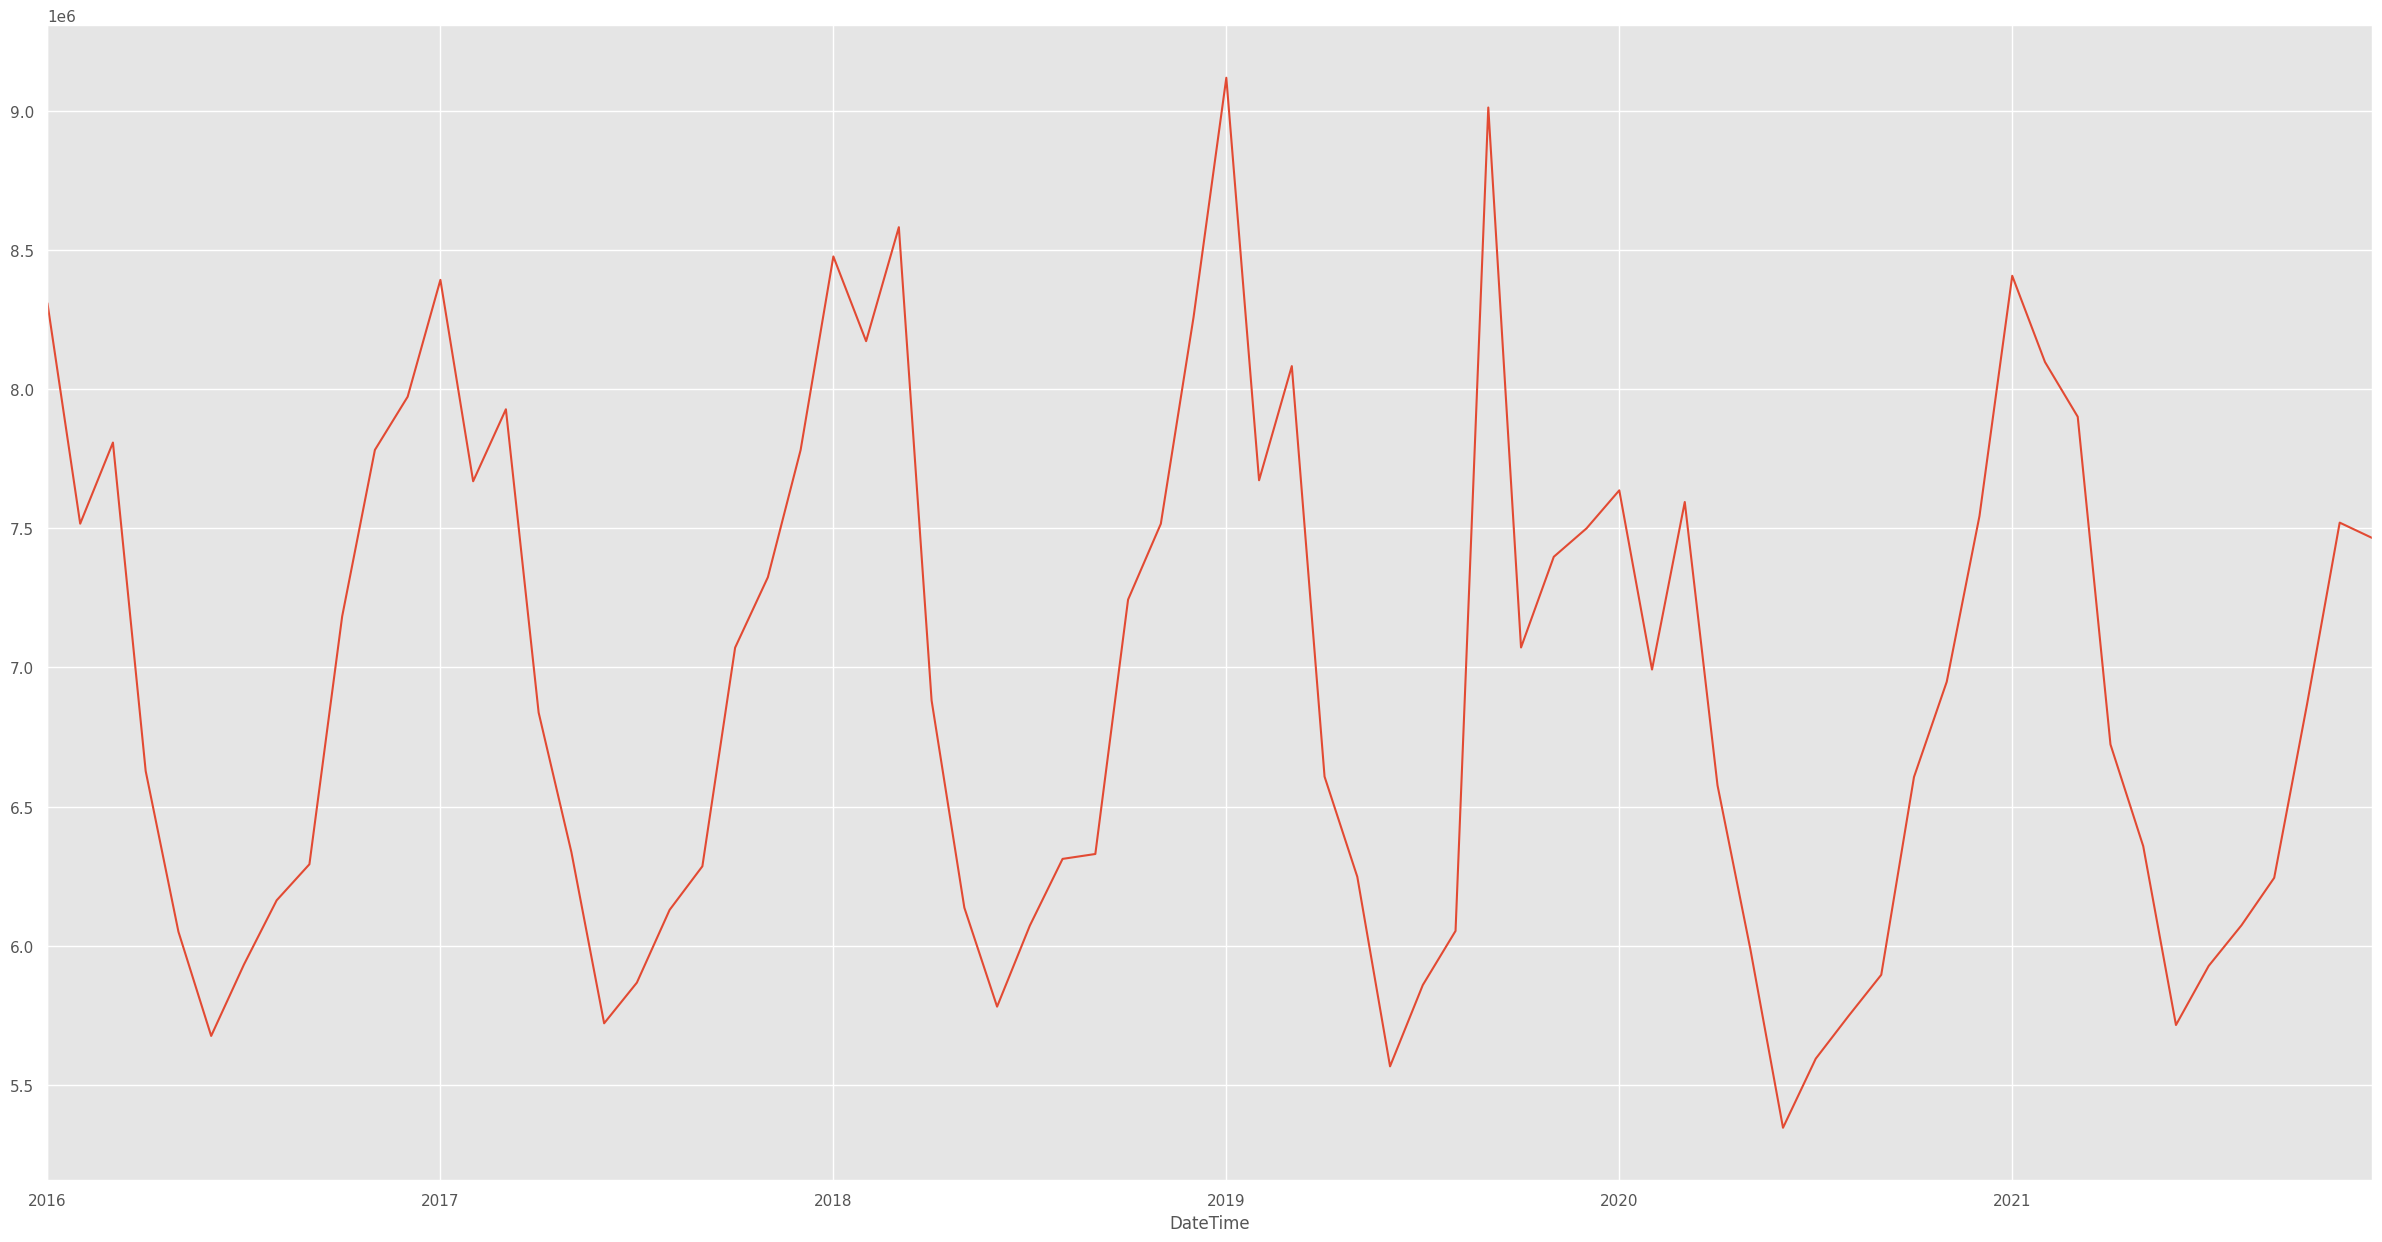

In [ ]:
df_monthly.plot()

In [ ]:
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

In [ ]:
# Perform the Augmented Dickey-Fuller test on a time series dataset df_monthly to check for stationarity.
# It prints the ADF test statistic and the p-value.
# A low ADF statistic and a p-value less than 0.05 indicate that the time series is likely stationary.

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_monthly)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.742182110899211
p-value: 6.238690722598549e-07


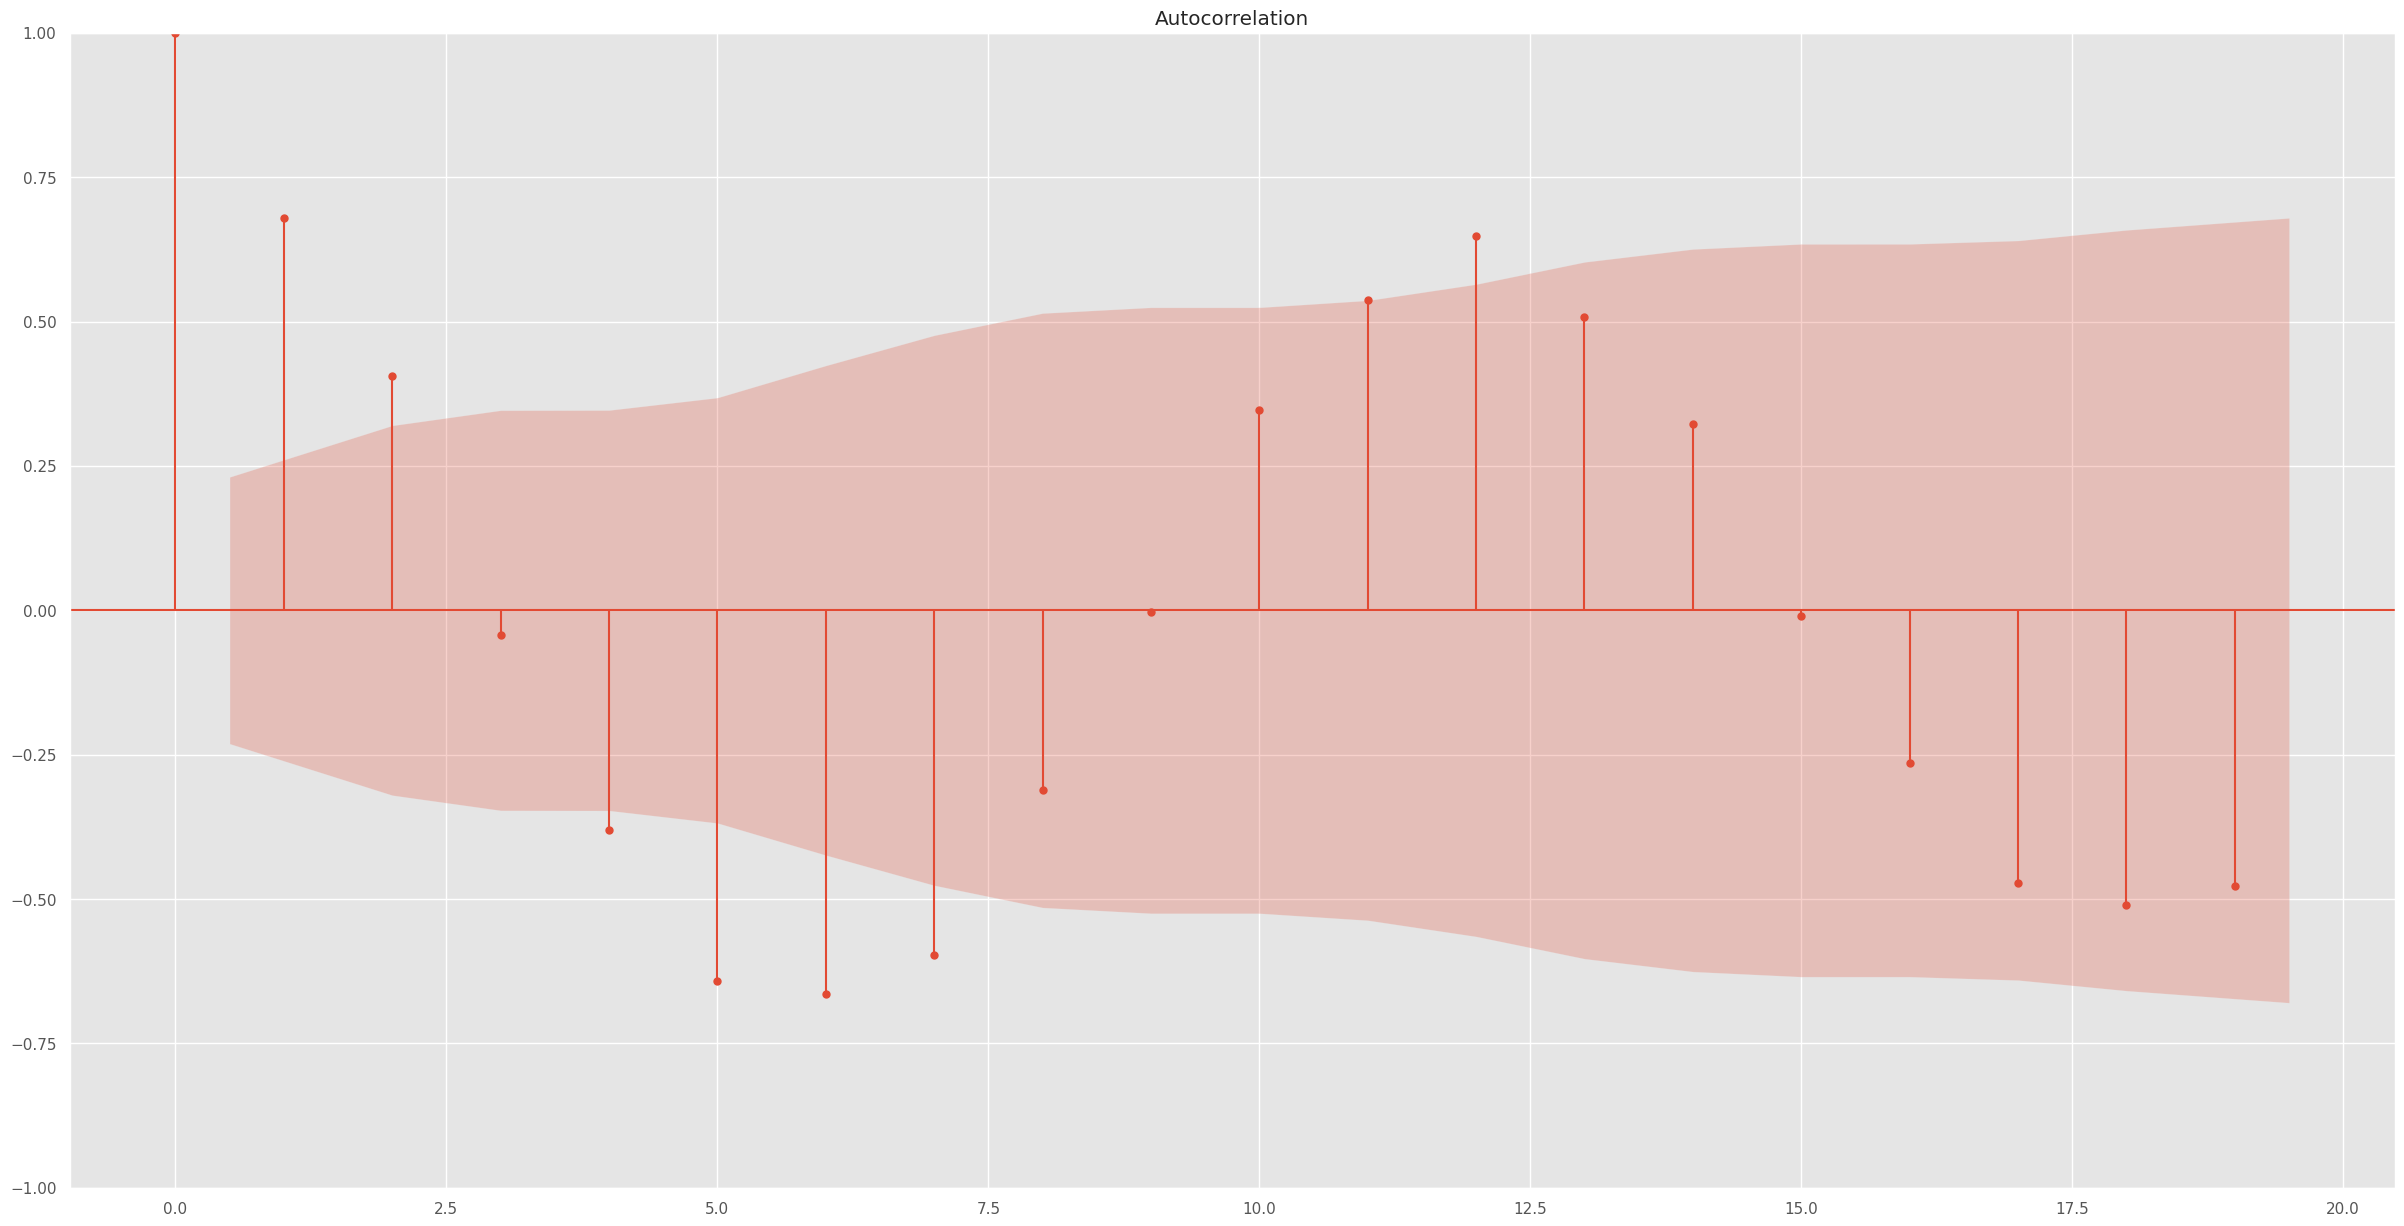

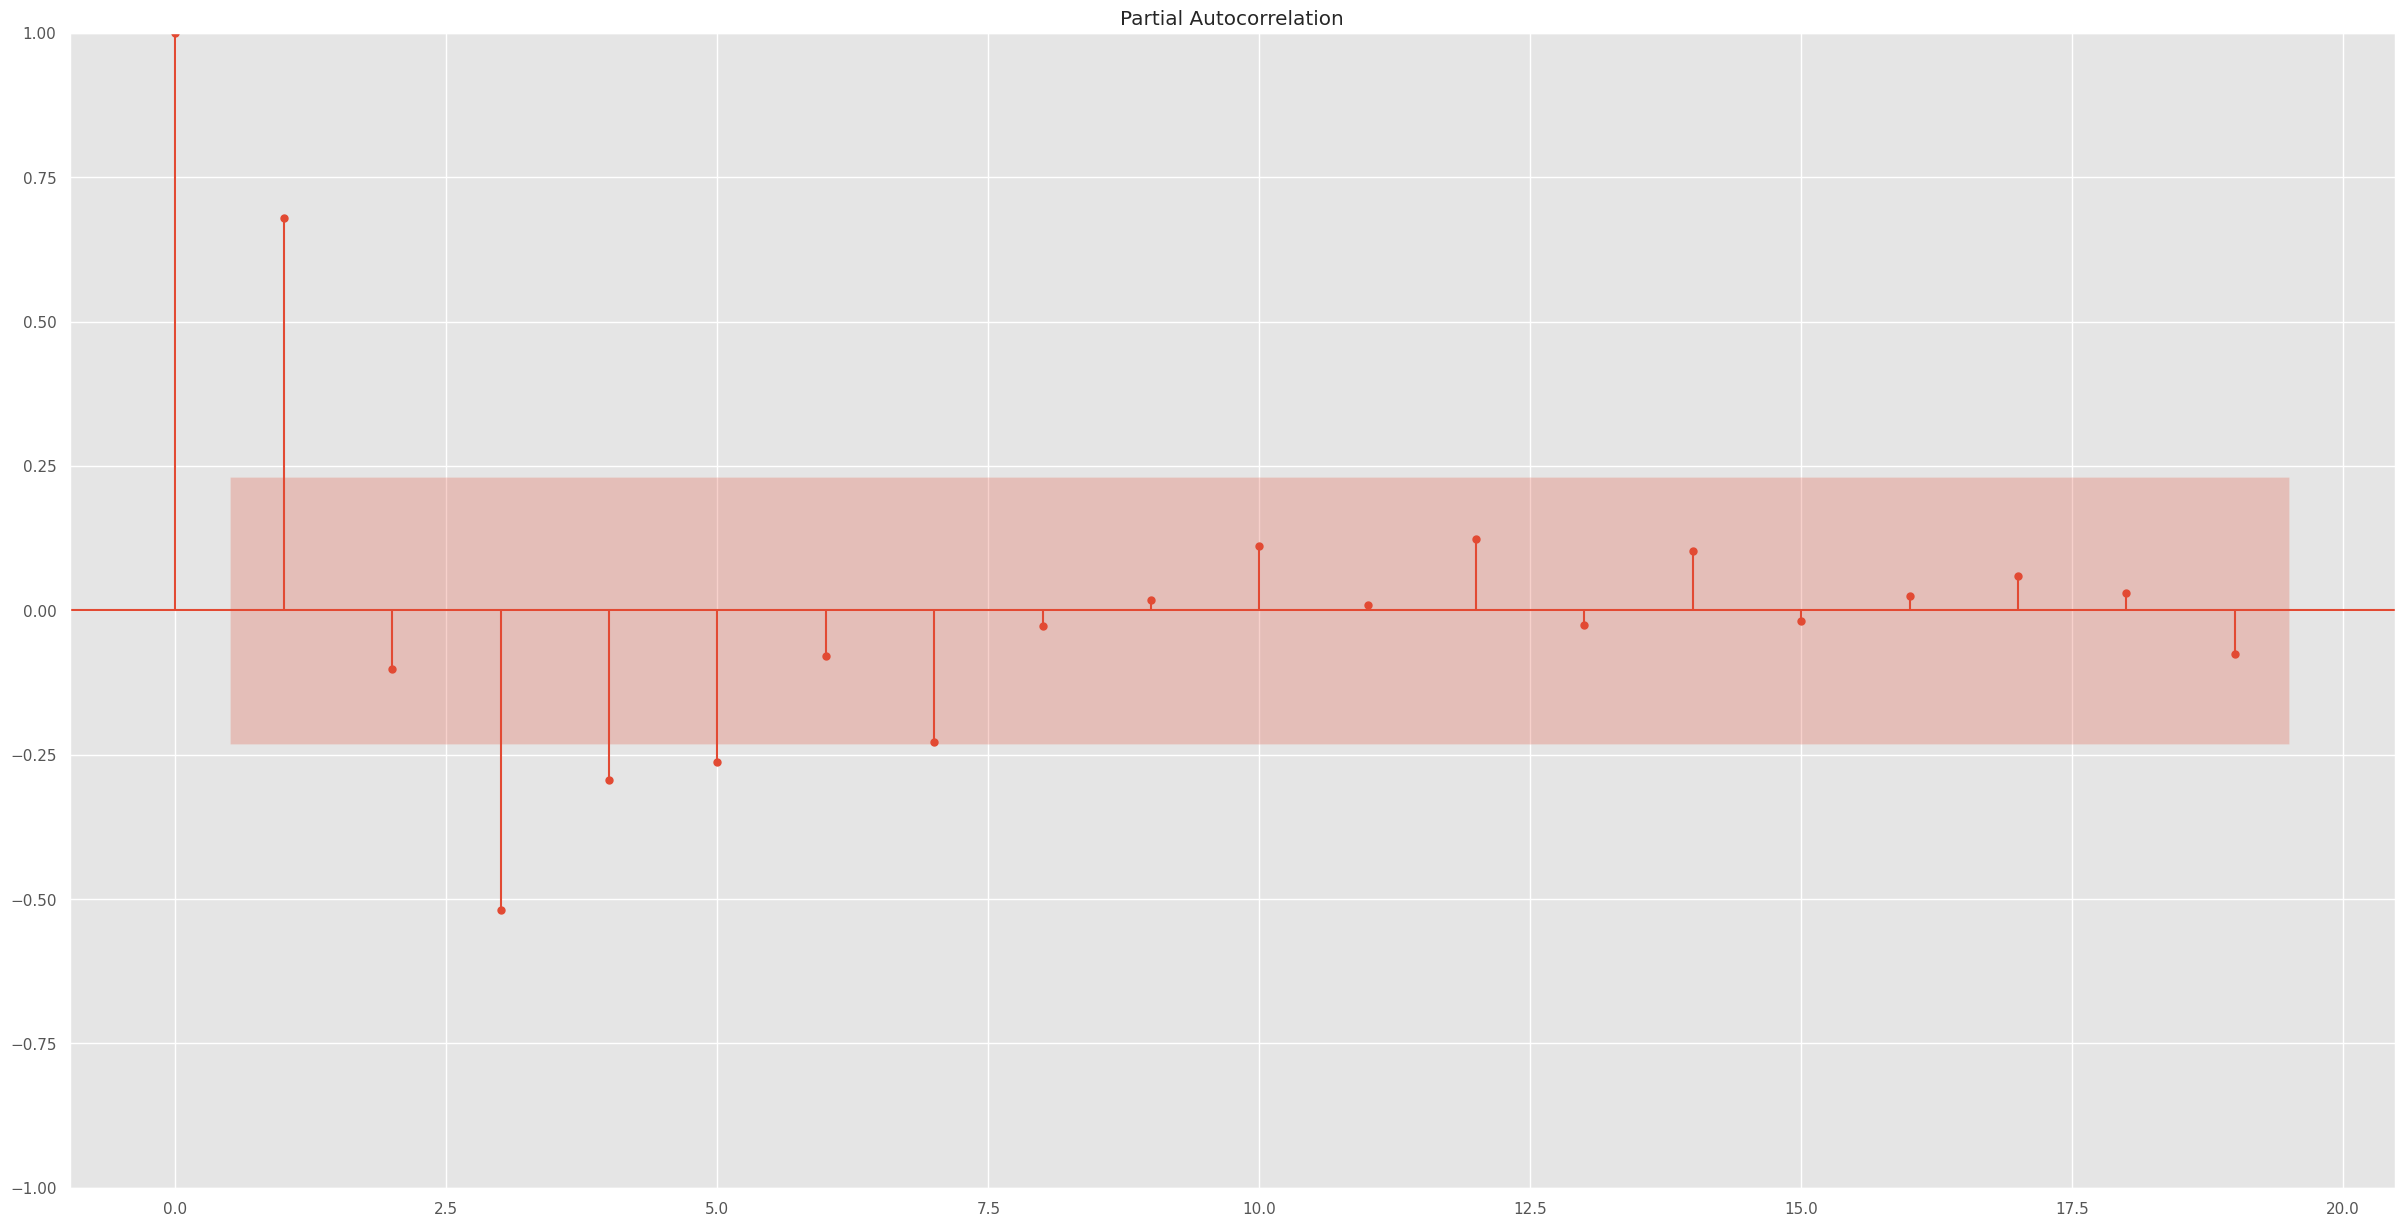

In [ ]:
# Generate and display the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the time series dataset df_monthly.
# These plots help identify patterns, such as seasonality and autocorrelation, and are used to determine appropriate parameters for our time series model.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_monthly)
plot_pacf(df_monthly)
plt.show()

In [ ]:
# Grid search over a range of ARIMA model parameters (p, d, q) to find the combination that yields
# the lowest AIC value for the time series dataset df_monthly.
# The best model parameters and the corresponding AIC value are printed.
# This helps in selecting the most suitable ARIMA model for the data.

# The Akaike Information Criterion (AIC) is a measure used in statistical modeling
# to evaluate the goodness of fit of a model while penalizing for the complexity of the model.
# It is used to compare different models and select the best one.

# Lower AIC values indicate a better model, as they suggest a better balance between fit and complexity.
# When comparing models, the one with the lowest AIC is usually preferred.

import itertools
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")


p = q = range(0, 5)
d=[0]
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        temp_model = sm.tsa.ARIMA(df_monthly, order=param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print('Best ARIMA{} - AIC:{}'.format(best_pdq, best_aic))


Best ARIMA(4, 0, 3) - AIC:2105.80821910721


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(4, 0, 3))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

In [ ]:
error = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {error}')

Mean Squared Error: 141695302092.0887


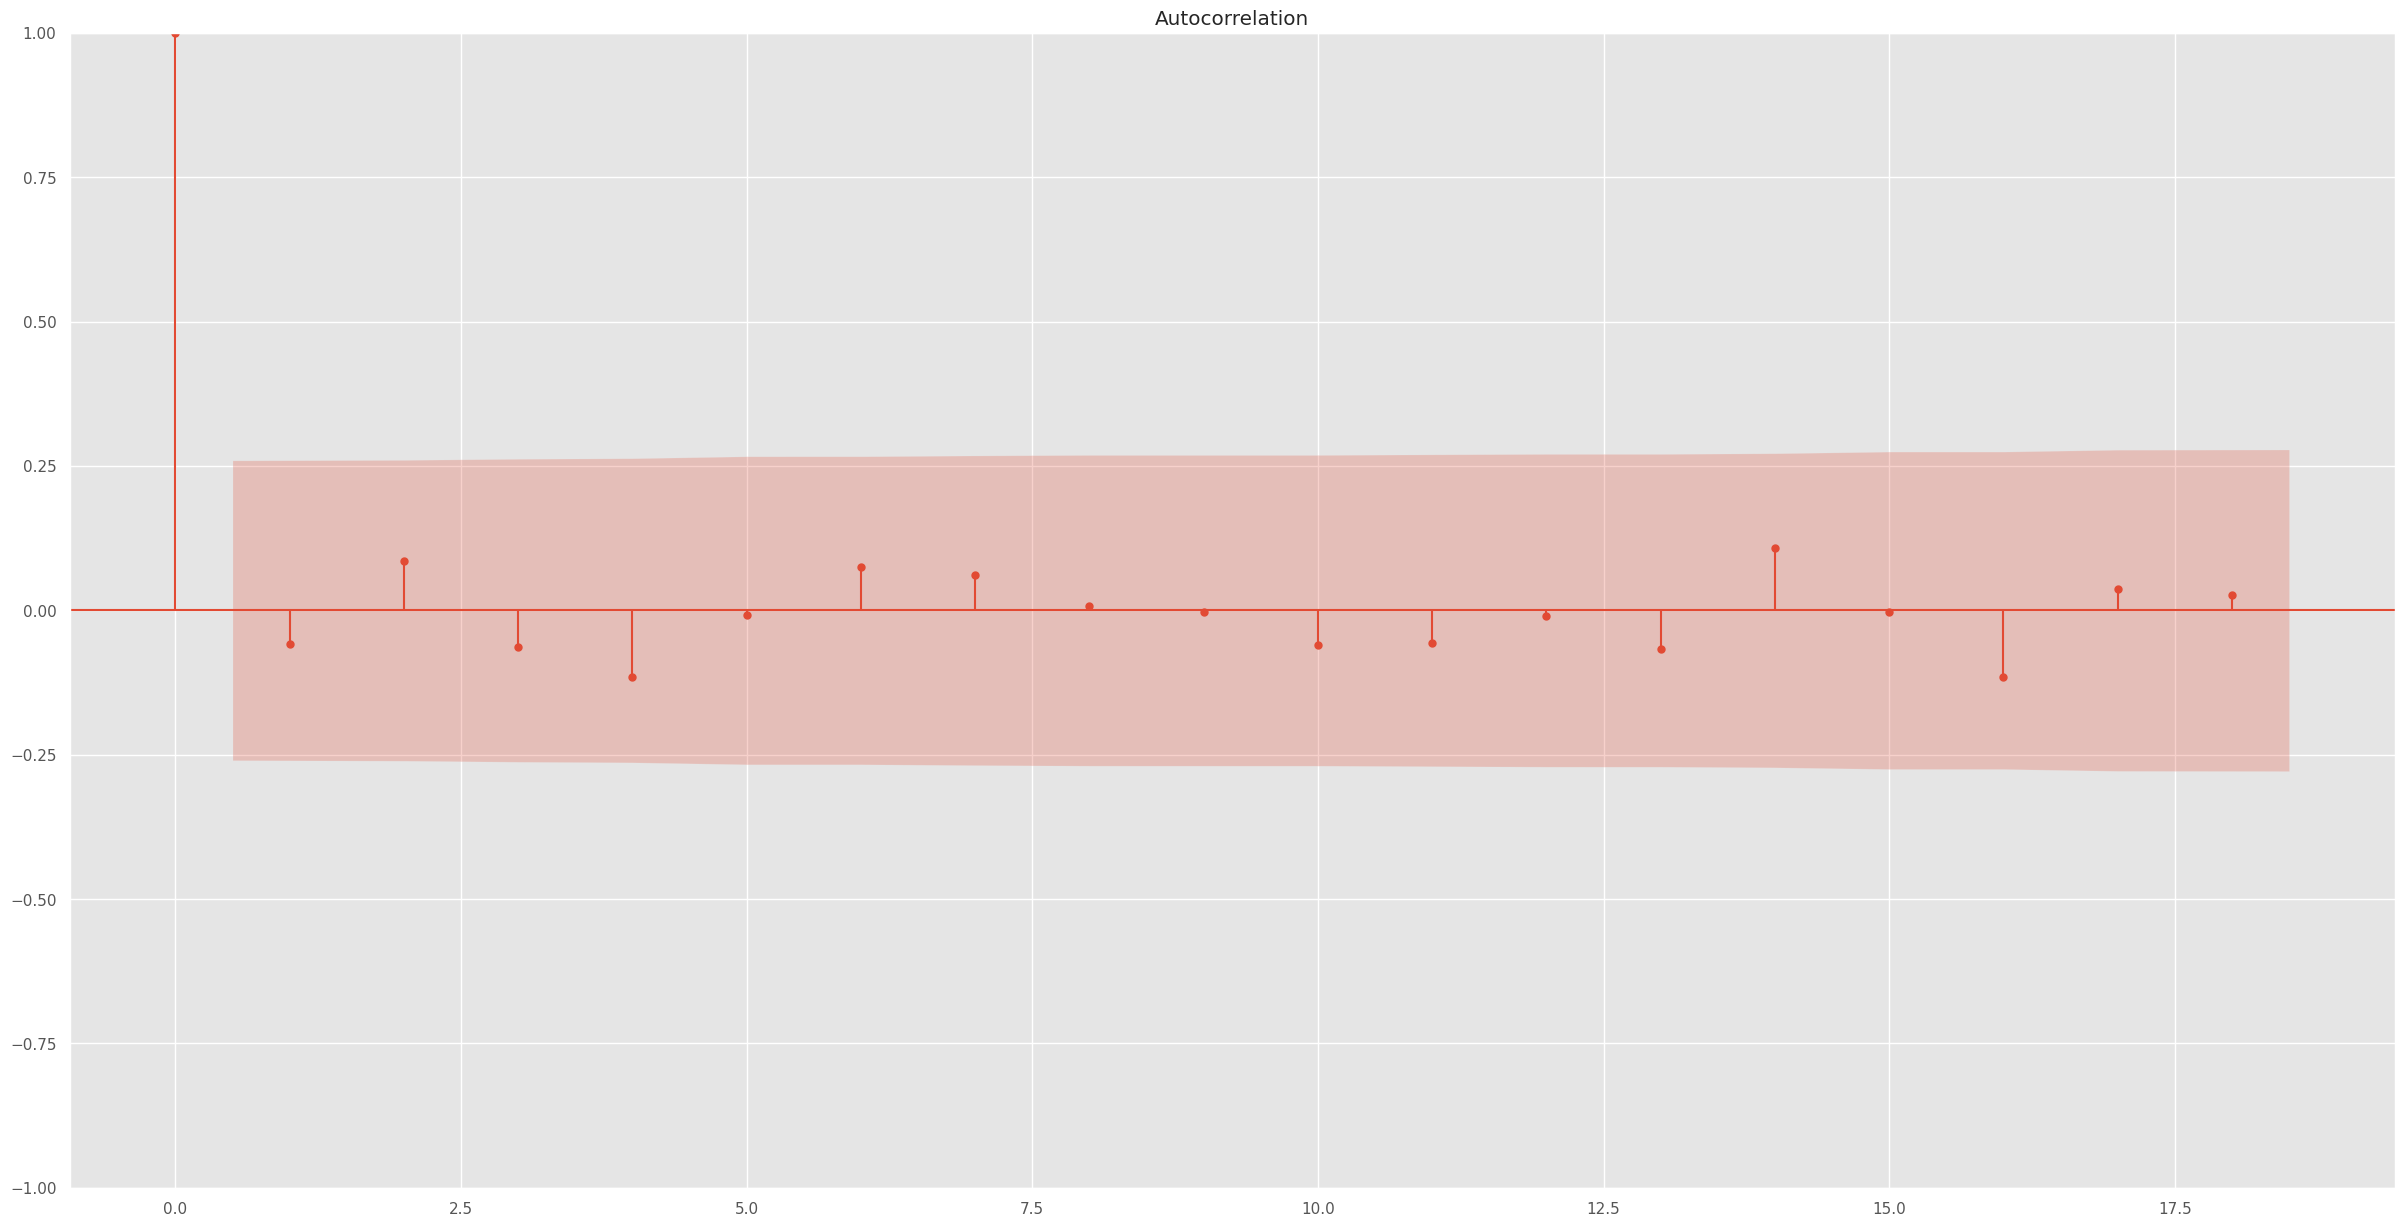

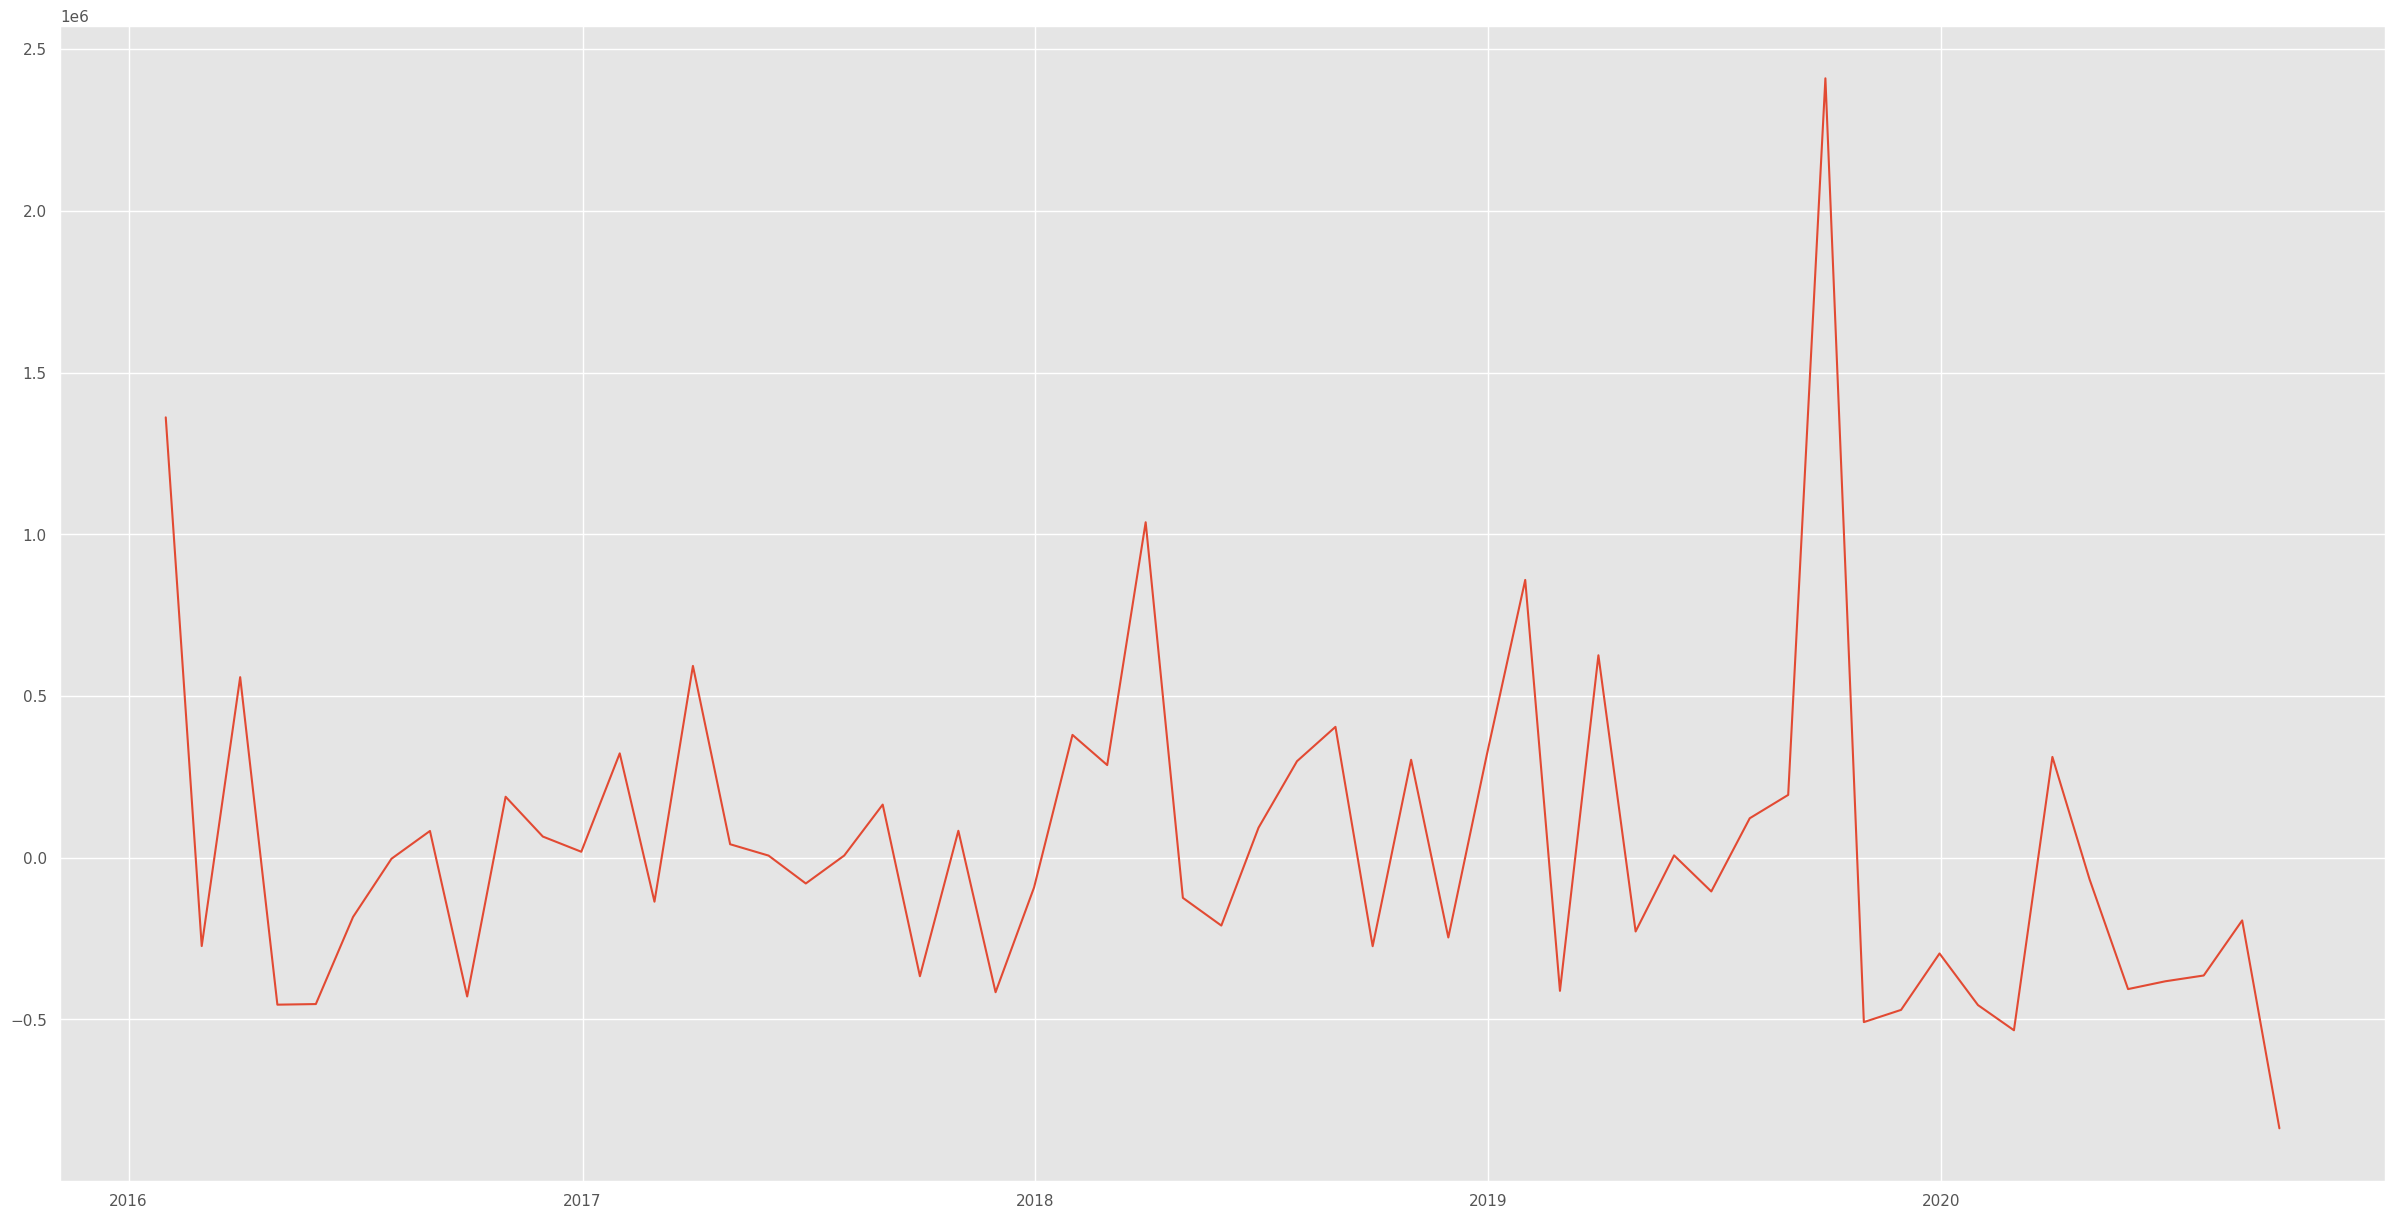

In [ ]:
residuals = model_fit.resid
plot_acf(residuals)
plt.show()

plt.figure()
plt.plot(residuals)
plt.show()


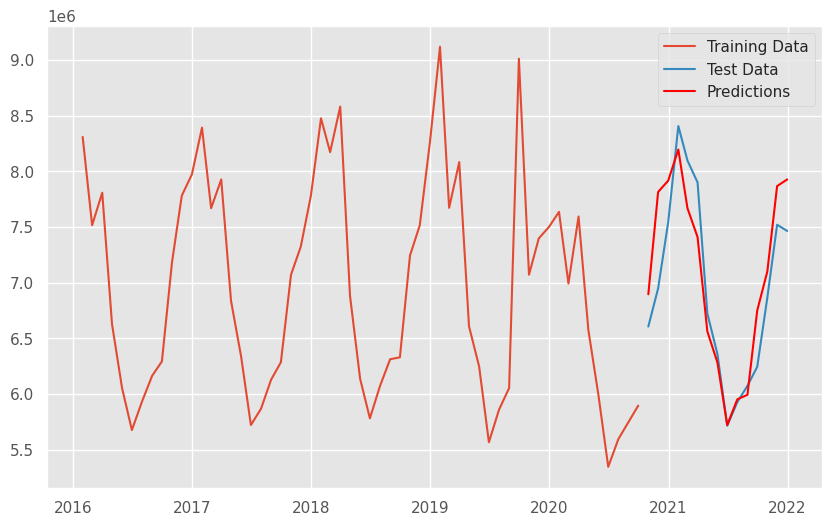

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# **Model Bulding : Using ANN Model**

In [ ]:
energyDataSet.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Electricity Consumption Rates  52774 non-null  float64
 1   Month                          52774 non-null  int32  
 2   Year                           52774 non-null  int32  
 3   Date                           52774 non-null  object 
 4   Time                           52774 non-null  object 
 5   Week                           52774 non-null  UInt32 
 6   Day                            52774 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(3)
memory usage: 2.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X = energyDataSet[['Month', 'Year', 'Week', 'Day']]
y = energyDataSet['Electricity Consumption Rates']

In [ ]:
X = pd.get_dummies(X, columns=['Day'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
ANN_X_train, ANN_X_test, ANN_y_train, ANN_y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
ANN_y_test.shape

(10555,)

In [ ]:
ANN_model = Sequential([
    Dense(128, activation='relu', input_shape=(ANN_X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(1)
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
ANN_model.fit(ANN_X_train, ANN_y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
1056/1056 [==============================] - 4s 3ms/step - loss: 13333794.0000 - val_loss: 818891.4375
Epoch 2/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1192597.3750 - val_loss: 783111.6250
Epoch 3/60
1056/1056 [==============================] - 2s 2ms/step - loss: 1172595.6250 - val_loss: 798628.0625
Epoch 4/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1144819.2500 - val_loss: 764151.8750
Epoch 5/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1137740.3750 - val_loss: 761158.5000
Epoch 6/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1118775.2500 - val_loss: 762011.0000
Epoch 7/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1100906.7500 - val_loss: 759727.0625
Epoch 8/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1087784.8750 - val_loss: 760742.6250
Epoch 9/60
1056/1056 [==============================] - 3s 3ms/step - loss: 1070250.3750 - val_

In [ ]:
# Make predictions
ANN_predictions = ANN_model.predict(ANN_X_test).flatten()

# Calculate metrics
# For example, mean absolute error
mae = np.mean(np.abs(ANN_predictions - ANN_y_test))

330/330 [==============================] - 1s 1ms/step


In [ ]:
print(mae)

614.6239503456596


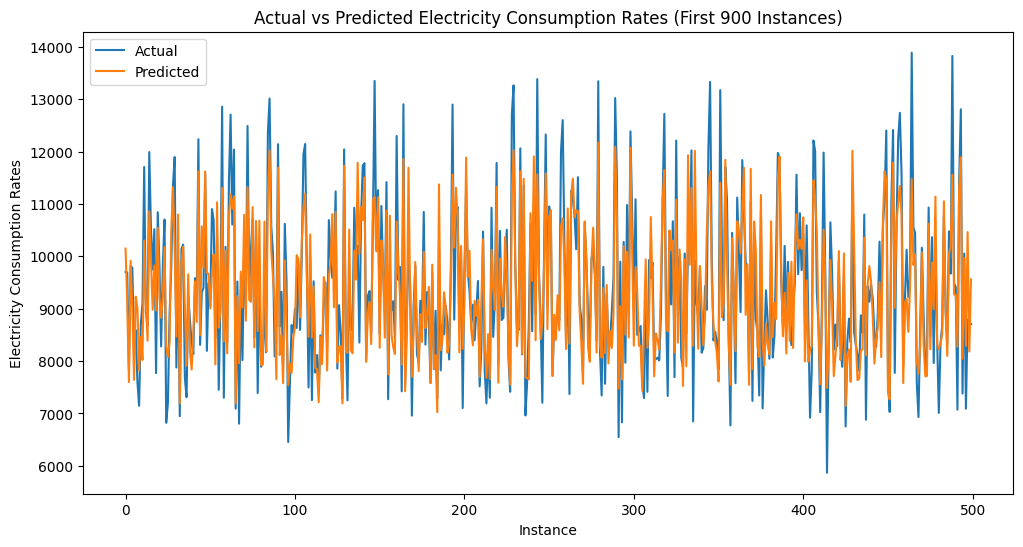

In [ ]:
y_test_array = ANN_y_test.values

# Slice the first 500 instances
y_test_slice = y_test_array[:500]
ANN_predictions_slice = ANN_predictions[:500]

# Plotting the actual vs predicted values for the first 900 instances
plt.figure(figsize=(12, 6))
plt.plot(y_test_slice, label='Actual')
plt.plot(ANN_predictions_slice, label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Electricity Consumption Rates')
plt.title('Actual vs Predicted Electricity Consumption Rates (First 900 Instances)')
plt.legend()
plt.show()

# **Model Building : Using Long Short-Term Memory(LSTM) Model.**

In [ ]:
# Select numeric columns for resampling
numeric_columns = energyDataSet.select_dtypes(include=['float64', 'int64'])

# Resample numeric columns
newNumericEnergyDataSet = numeric_columns.resample("D").mean()

# Select non-numeric columns and forward-fill them
non_numeric_columns = energyDataSet.select_dtypes(include=['object'])
newNonNumericEnergyDataSet = non_numeric_columns.resample("D").first().ffill()

# Combine numeric and non-numeric resampled datasets
newEnergyDataSet = pd.concat([newNumericEnergyDataSet, newNonNumericEnergyDataSet], axis=1)

# Extract Month, Year, and Week from DateTime index
newEnergyDataSet['Month'] = newEnergyDataSet.index.month
newEnergyDataSet['Year'] = newEnergyDataSet.index.year
newEnergyDataSet['Week'] = newEnergyDataSet.index.isocalendar().week

# Reorder columns as desired
newEnergyDataSet = newEnergyDataSet[['Electricity Consumption Rates', 'Month', 'Year', 'Week']]

print("Old Dataset: ", energyDataSet.shape)
print("New Dataset: ", newEnergyDataSet.shape)
newEnergyDataSet.head(20)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


Electricity Consumption Rates  Month  Year  Week
DateTime                                                    
2016-01-04                   12300.625000      1  2016     1
2016-01-05                   12945.375000      1  2016     1
2016-01-06                   13192.750000      1  2016     1
2016-01-07                   14243.541667      1  2016     1
2016-01-08                   14121.666667      1  2016     1
2016-01-09                   12831.750000      1  2016     1
2016-01-10                   12519.000000      1  2016     1
2016-01-11                   12887.368421      1  2016     2
2016-01-12                   12658.166667      1  2016     2
2016-01-13                   12883.041667      1  2016     2
2016-01-14                   12855.041667      1  2016     2
2016-01-15                   12974.416667      1  2016     2
2016-01-16                   12661.250000      1  2016     2
2016-01-17                   12378.708333      1  2016     2
2016-01-18                   13578.791667      1  2016     3
2016-01-19                   13531.791667      1  2016     3
2016-01-20                   13671.541667      1  2016     3
2016-01-21                   13677.166667      1  2016     3
2016-01-22                   13975.416667      1  2016     3
2016-01-23                   12082.416667      1  2016     3

In [ ]:
y = newEnergyDataSet['Electricity Consumption Rates']
print(y[1])
print(y.shape)

12945.375
(2184,)


In [ ]:
# Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before fitting int LSTM Model:")
print(y[:10])

Normalizing data before fitting int LSTM Model:
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]
print("Training data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print("Validation data shape: ", val_data.shape)

Training data shape:  (1398, 1)
Test data shape:  (437, 1)
Validation data shape:  (349, 1)


In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)
print(y_train.shape)
print(ytest.shape)
print(yval.shape)

X_train shape:  (1297, 100)
X_test shape:  (336, 100)
X_val shape:  (248, 100)
(1297,)
(336,)
(248,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
trainingLSTM = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 90 ,batch_size = 20)
# Saving trained model in h5
import torch
torch.save(model, 'LSTM_Model.h5')

Epoch 1/90
65/65 [==============================] - 13s 51ms/step - loss: 0.0247 - val_loss: 0.0055
Epoch 2/90
65/65 [==============================] - 1s 21ms/step - loss: 0.0090 - val_loss: 0.0045
Epoch 3/90
65/65 [==============================] - 2s 25ms/step - loss: 0.0091 - val_loss: 0.0044
Epoch 4/90
65/65 [==============================] - 2s 31ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 5/90
65/65 [==============================] - 1s 21ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 6/90
65/65 [==============================] - 1s 21ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 7/90
65/65 [==============================] - 1s 20ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 8/90
65/65 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0044
Epoch 9/90
65/65 [==============================] - 1s 21ms/step - loss: 0.0076 - val_loss: 0.0035
Epoch 10/90
65/65 [==============================] - 1s 21ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 11

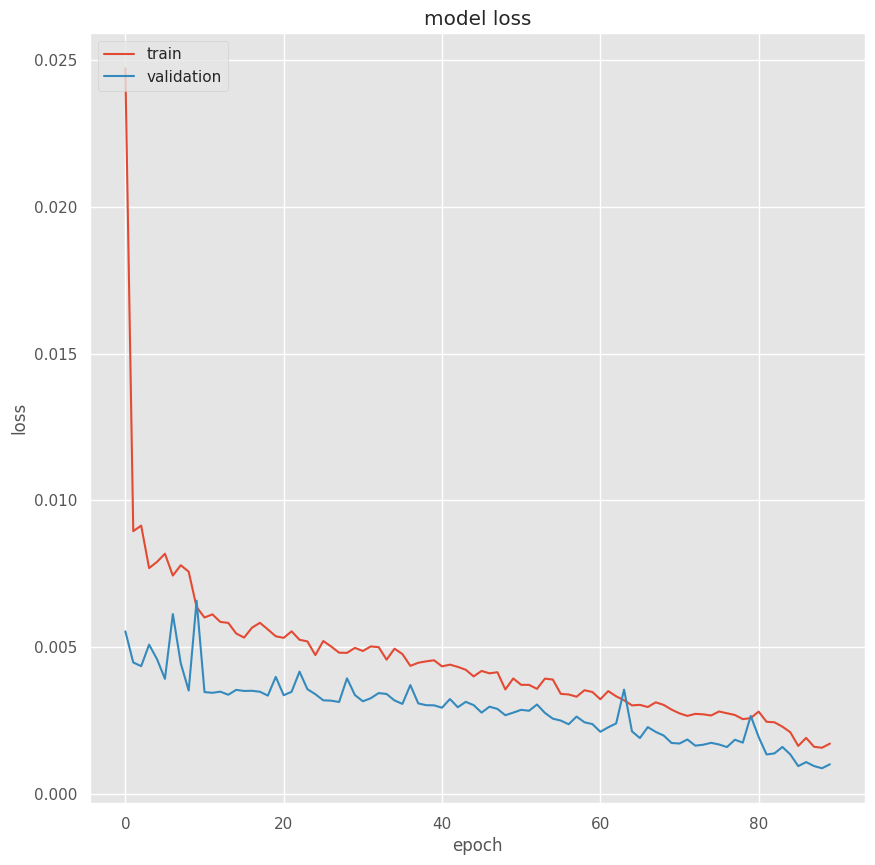

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(trainingLSTM.history['loss']) # tb
plt.plot(trainingLSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
tf.__version__
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


8/8 [==============================] - 0s 12ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
# math.sqrt(mean_squared_error(ytest,test_predict))
# math.sqrt(mean_squared_error(yval,val_predict))

9596.364929174102

In [ ]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1297, 1)
(336, 1)
(248, 1)
[9405.916]
(1297,)


In [ ]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results


41/41 [==============================] - 0s 8ms/step


Train Predictions               Actuals
0       [9405.916015625]   [9406.708333333334]
1      [9615.2568359375]   [9614.791666666666]
2          [9691.796875]   [9894.708333333334]
3      [9386.1923828125]   [8933.708333333334]
4      [8546.5751953125]   [8557.208333333334]
...                  ...                   ...
1292   [8956.3525390625]   [9259.666666666666]
1293    [9897.255859375]             [10248.5]
1294  [10233.7822265625]  [10360.333333333334]
1295  [10346.6826171875]  [10489.833333333334]
1296   [10668.423828125]             [10204.5]

[1297 rows x 2 columns]

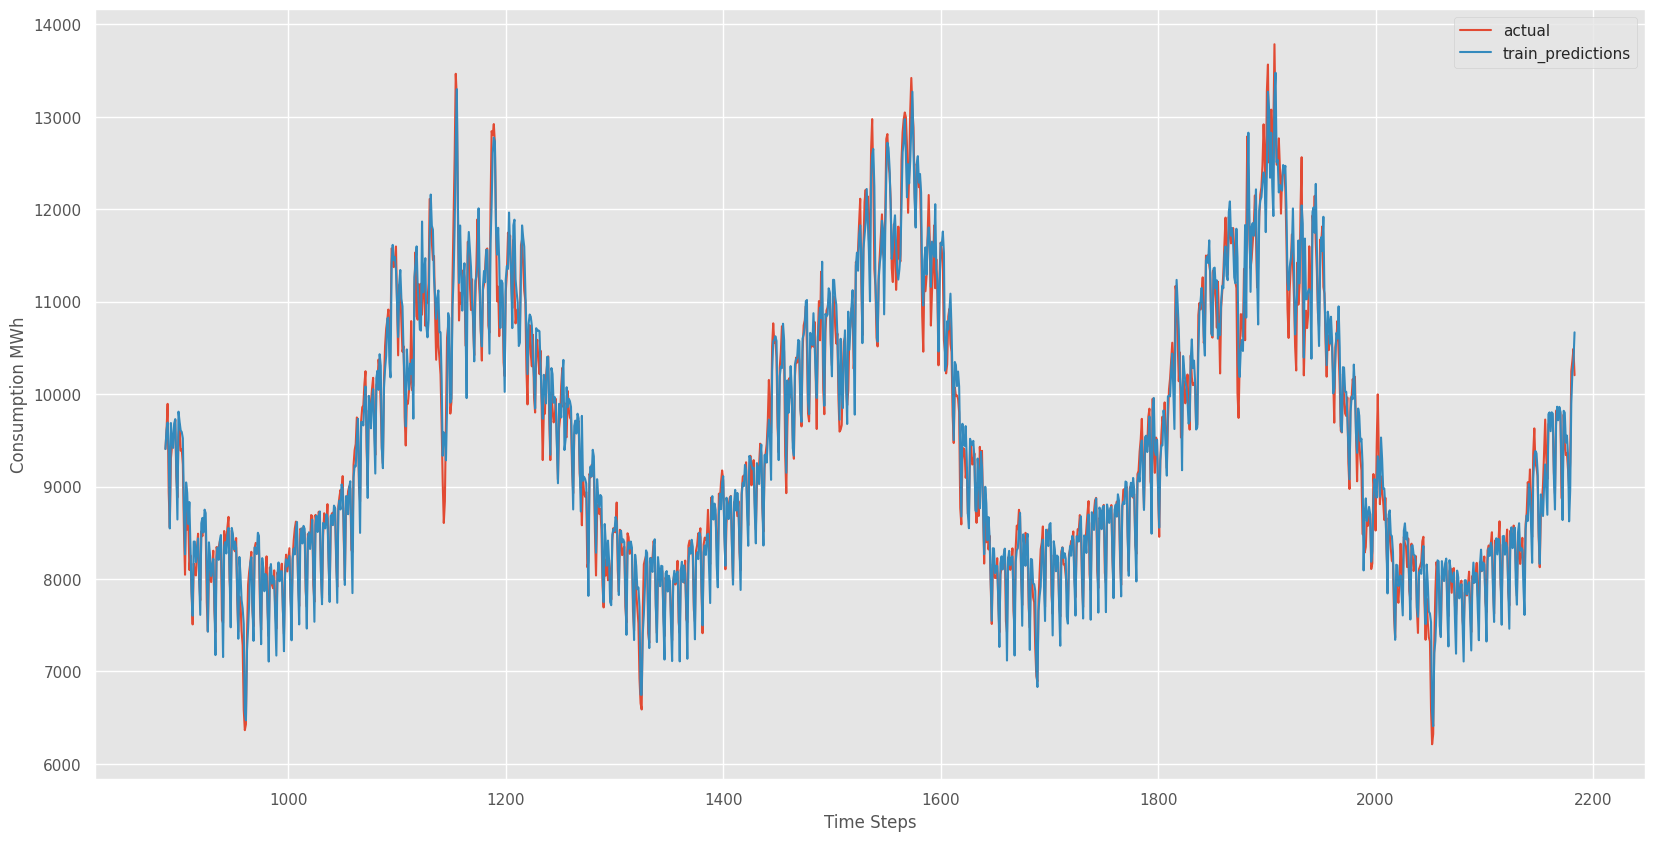

In [ ]:

plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()


In [ ]:

# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

8/8 [==============================] - 0s 8ms/step


Val Predictions           Actuals_val
0      [9814.958984375]            [8931.875]
1     [9314.9794921875]   [9112.916666666666]
2      [9172.705078125]  [10019.416666666666]
3    [10067.7705078125]           [10390.375]
4     [10613.693359375]  [10802.916666666666]
..                  ...                   ...
243       [8066.984375]   [8020.541666666667]
244  [7533.03369140625]             [7921.75]
245   [8556.4150390625]   [8705.041666666666]
246       [8735.296875]   [8824.708333333334]
247   [8664.0322265625]            [9062.375]

[248 rows x 2 columns]

Text(0, 0.5, 'Consumption MWh')

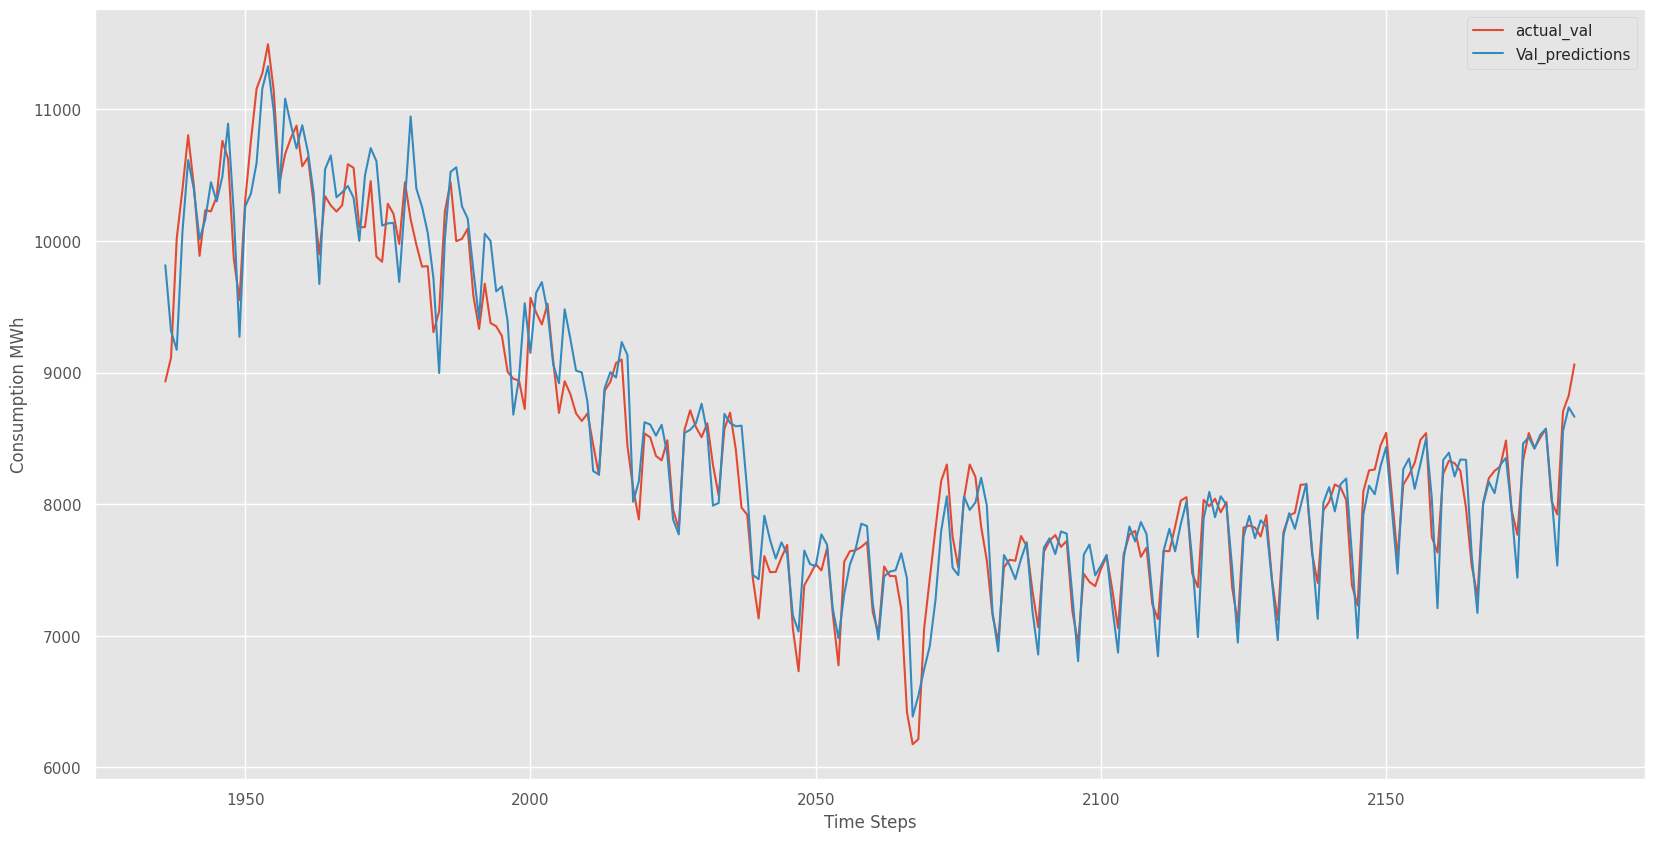

In [ ]:

plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

In [ ]:

# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 [==============================] - 0s 7ms/step


test Predictions          Actuals_test
0    [10388.2900390625]  [10032.541666666666]
1      [11155.87109375]           [10732.125]
2      [11002.56640625]  [10733.583333333334]
3       [10742.5703125]           [10971.875]
4    [11174.8779296875]  [11227.791666666666]
..                  ...                   ...
331  [12382.9814453125]            [12540.25]
332   [12561.806640625]  [12635.958333333334]
333   [12823.478515625]  [11684.333333333334]
334   [11334.091796875]  [11384.166666666666]
335    [11223.84765625]           [11581.625]

[336 rows x 2 columns]

Text(0, 0.5, 'Consumption MWh')

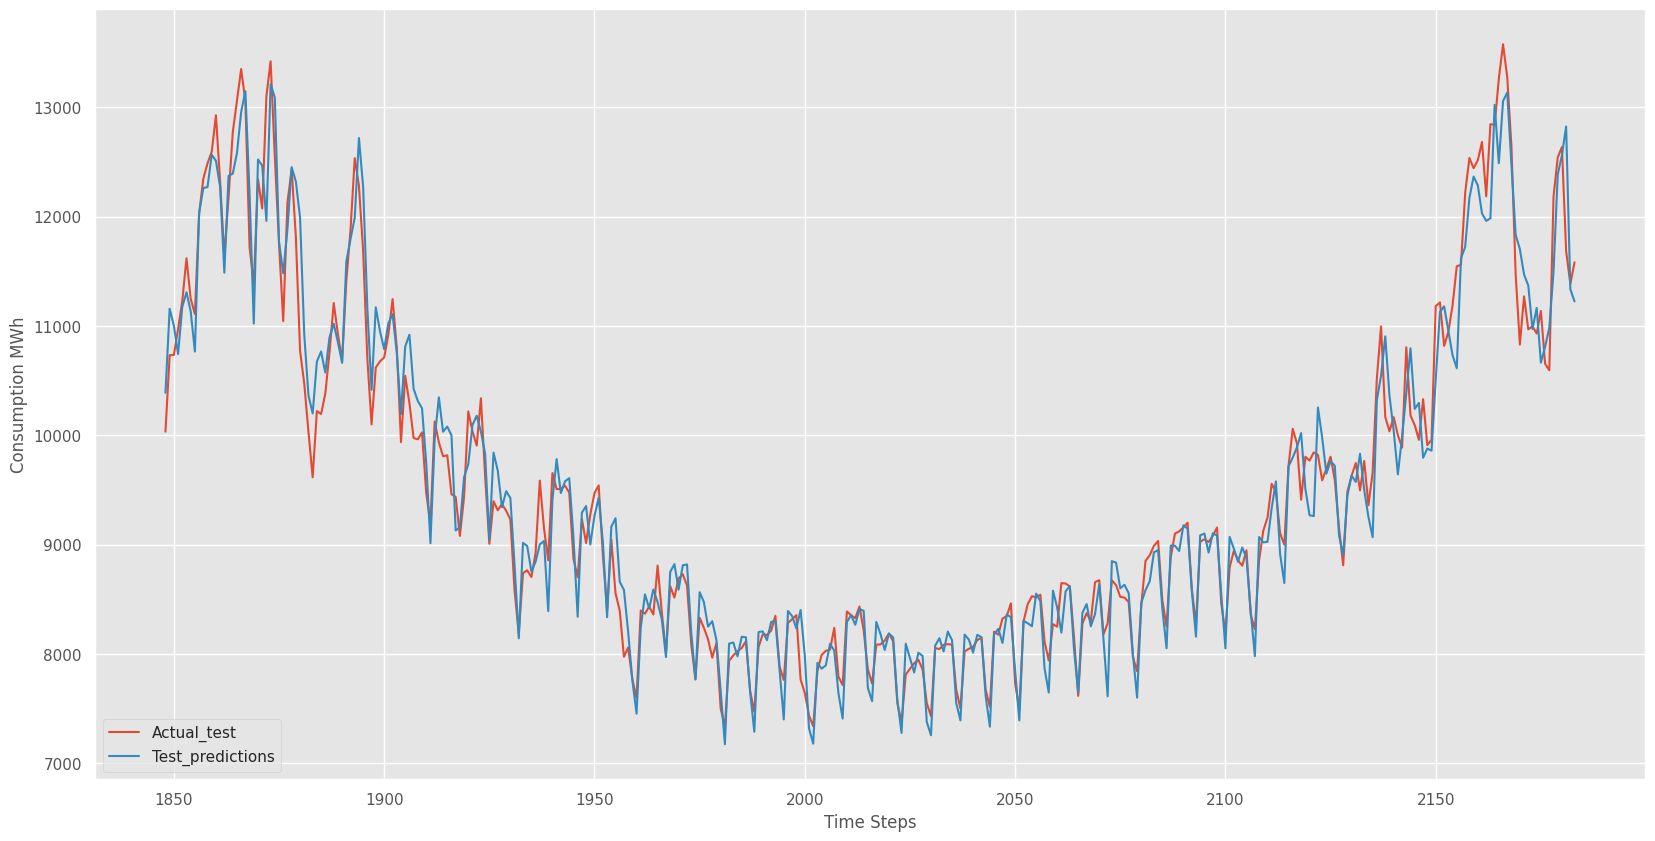

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

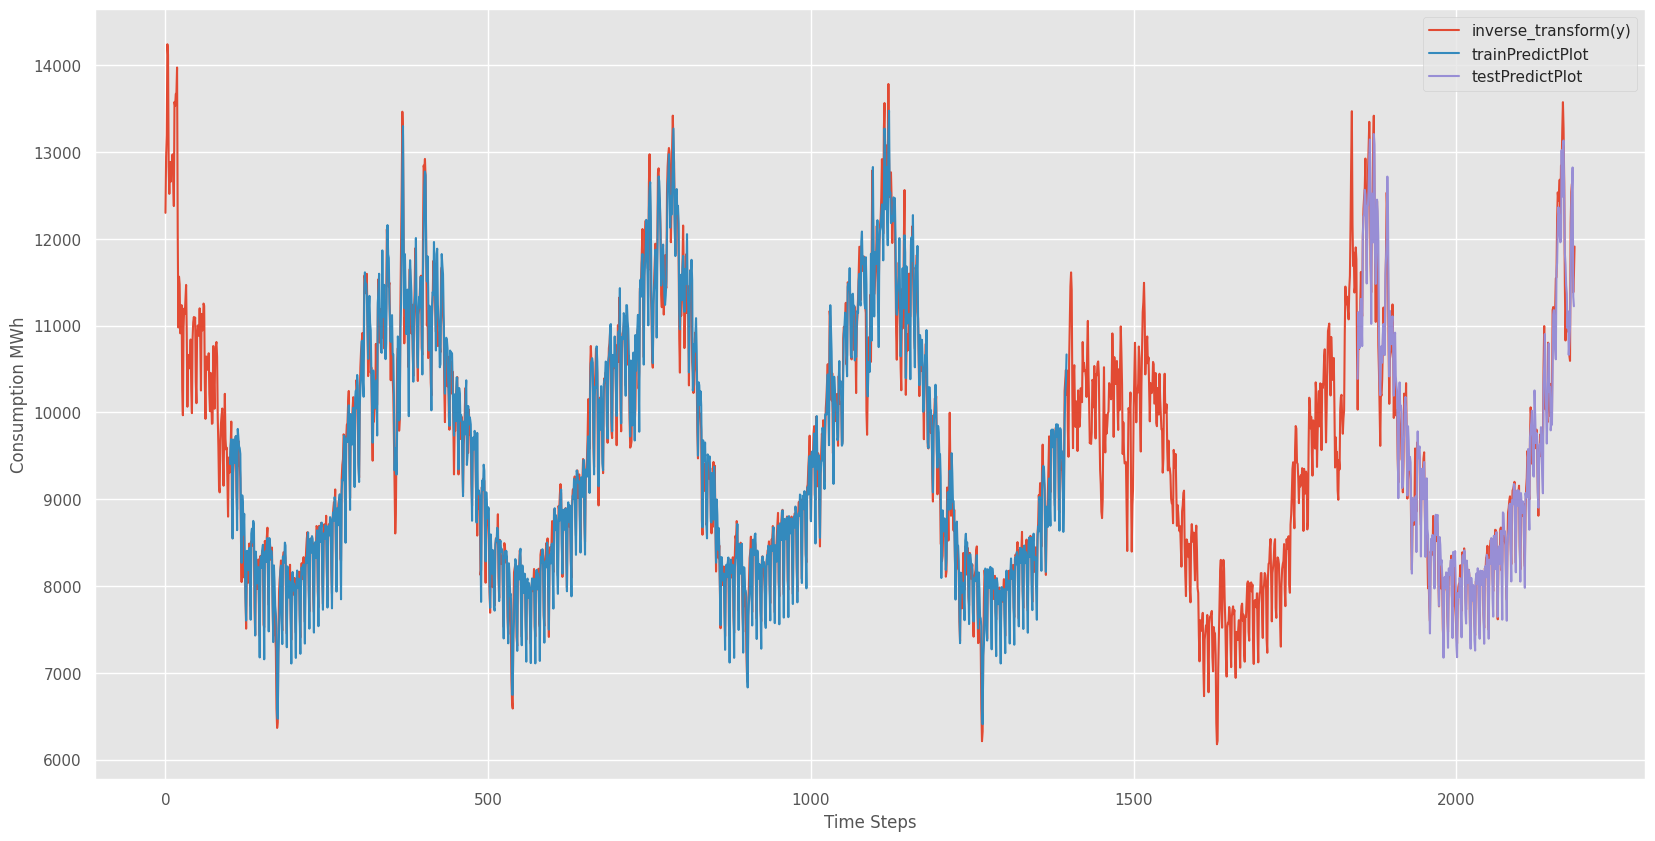

In [ ]:

### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# **Future Prediction**

In [ ]:

print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [ ]:


# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

2184
[[12344.80350564]
 [12455.898143  ]
 [12535.74839036]
 [12575.61076174]
 [12127.61229465]
 [11511.17369379]
 [12038.50981096]
 [12491.65252338]
 [12490.67493404]
 [12571.36428292]
 [12606.87727133]
 [12080.86015443]
 [11448.24107955]
 [12106.49242188]
 [12501.54863189]
 [12469.19056902]
 [12578.32666169]
 [12615.92658455]
 [12039.40565402]
 [11411.75290609]
 [12113.68609453]
 [12465.38840527]
 [12417.10809047]
 [12535.39640049]
 [12578.94504825]
 [12010.04864136]
 [11368.67502073]
 [12081.36746223]
 [12367.54868681]
 [12303.68705014]]


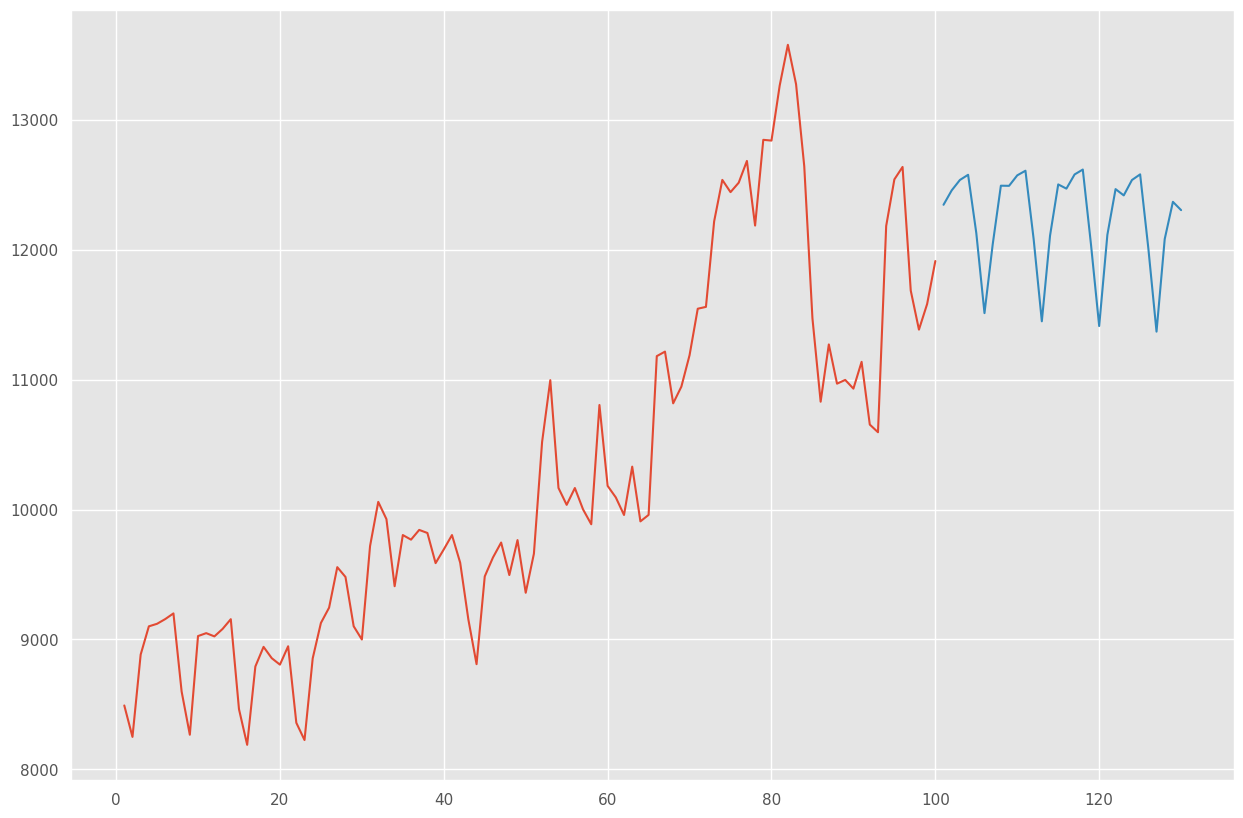

In [ ]:

print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

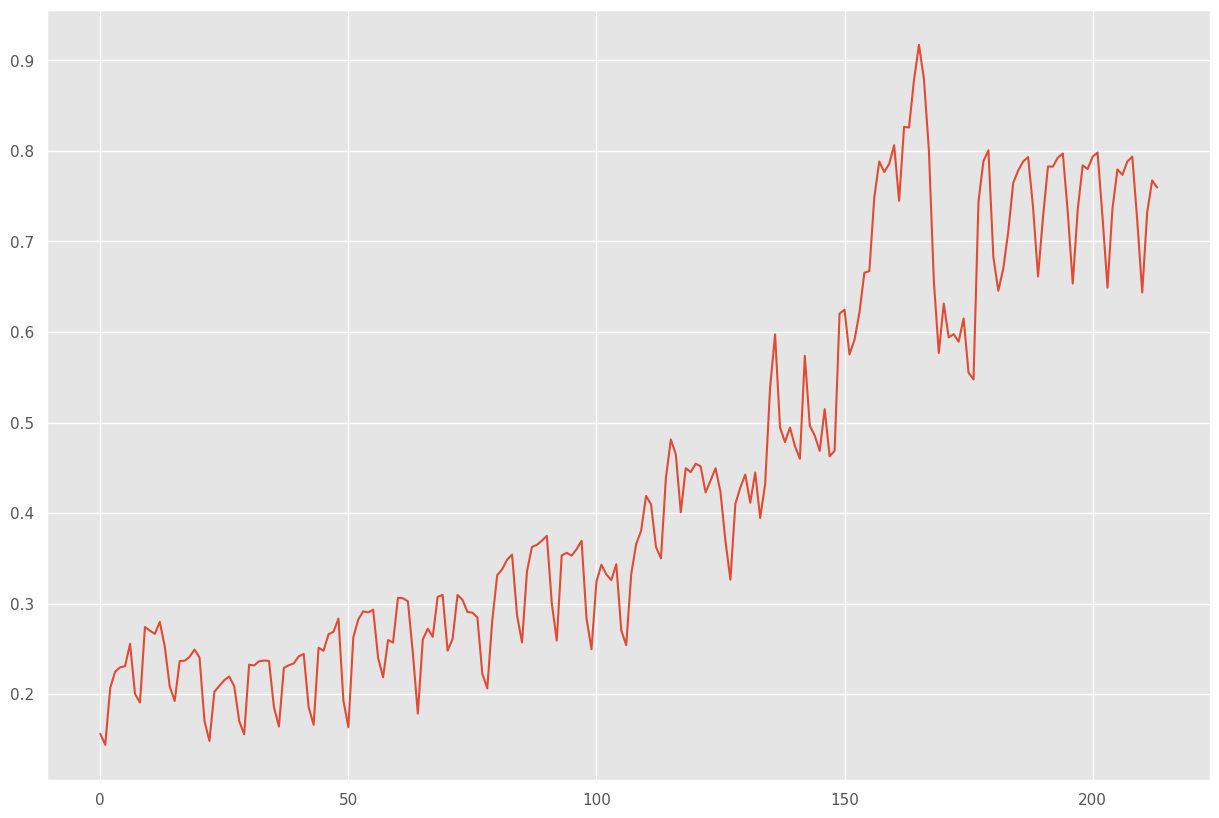

In [ ]:

df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])
